In [1]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing


In [2]:
mousetrain_df = pd.read_csv("MouseTrain.csv")
display(mousetrain_df)
mousetest_df = pd.read_csv('MouseTest.csv')
display(mousetest_df)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine_C/S
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine_C/S
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine_C/S
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine_C/S
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine_C/S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.394169,0.623696,0.316564,2.104045,3.314706,0.234529,0.200657,3.208804,0.221809,1.218951,...,0.110916,0.119428,0.115567,0.441207,0.148473,0.146192,0.190681,1.474465,Ts65Dn,Saline_S/C
758,0.401739,0.659571,0.321841,2.183930,3.411782,0.236546,0.190826,3.384350,0.231899,1.250487,...,0.110350,0.118081,0.108944,0.444913,0.153137,0.149798,0.197944,1.516605,Ts65Dn,Saline_S/C
759,0.382182,0.586545,0.318545,2.072000,3.073636,0.259636,0.202727,3.006364,0.223455,1.248727,...,0.133664,0.116134,0.114635,0.422789,0.148426,0.163649,0.191212,1.433514,Ts65Dn,Saline_S/C
760,0.365622,0.572209,0.297992,2.004931,2.783551,0.245333,0.190384,2.948221,0.217506,1.177527,...,0.136994,0.120649,0.120649,0.459901,0.146872,0.140640,0.213899,1.543274,Ts65Dn,Saline_S/C


,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.627582,0.954187,0.446958,2.930717,5.915039,0.197897,0.185599,1.765115,0.232257,1.808111,...,0.120835,0.148773,0.120885,0.541241,0.121674,0.158103,NaN,1.649983,Control,Memantine_C/S
1,0.651253,0.962021,0.464964,2.992689,5.975028,0.202810,0.188473,1.807824,0.259020,1.960691,...,0.130462,0.147660,0.128960,0.525966,0.126780,0.163405,NaN,1.638988,Control,Memantine_C/S
2,0.644346,0.967179,0.470056,3.073847,5.927379,0.205131,0.182590,1.783552,0.258795,2.147883,...,0.118851,0.143169,0.129154,0.508214,0.122796,0.160293,NaN,1.564925,Control,Memantine_C/S
3,0.568229,0.812018,0.393465,2.606780,5.808102,0.218211,0.179905,2.312324,0.209154,1.733692,...,0.116218,0.140063,0.127661,0.561721,0.123122,0.156108,NaN,1.682222,Control,Memantine_C/S
4,0.587038,0.863728,0.411203,2.757975,6.006657,0.223688,0.189400,2.375283,0.218538,1.843255,...,0.142739,0.140775,0.121389,0.534845,0.133996,0.180373,NaN,1.660352,Control,Memantine_C/S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0.226900,0.395432,0.248694,1.460666,1.860128,0.188536,0.148977,2.178982,0.165398,0.770115,...,0.157209,0.122747,0.134559,0.400268,0.228568,0.233317,0.283853,1.160740,Ts65Dn,Saline_S/C
221,0.261107,0.443780,0.276658,1.674129,2.256494,0.218216,0.176008,2.475735,0.184040,0.913363,...,0.151454,0.119881,0.131988,0.407596,0.228843,0.226944,0.249970,1.139347,Ts65Dn,Saline_S/C
222,0.216134,0.364058,0.241693,1.330831,1.737540,0.197125,0.151597,1.919489,0.162780,0.720767,...,0.171437,0.118758,0.146772,0.431334,0.255633,0.257004,0.304811,1.142205,Ts65Dn,Saline_S/C
223,0.212369,0.369960,0.239036,1.346827,1.814940,0.194538,0.143454,1.908112,0.155823,0.772530,...,0.177576,0.121366,0.152825,0.395408,0.245564,0.255852,0.308484,1.112718,Ts65Dn,Saline_S/C


In [3]:
print(mousetrain_df.shape)

(762, 79)


In [4]:
print(mousetrain_df.dtypes)

DYRK1A_N              float64
ITSN1_N               float64
BDNF_N                float64
NR1_N                 float64
NR2A_N                float64
                       ...   
EGR1_N                float64
H3MeK4_N              float64
CaNA_N                float64
Genotype               object
Treatment_Behavior     object
Length: 79, dtype: object


In [5]:
#num_df.pGSK3B_Tyr216_N = num_df.pGSK3B_Tyr216_N.astype('float64')

There are 762 training data samples in given dataset


In [5]:
test_data_df = mousetest_df.select_dtypes(include=['int64','float64']).copy() 
test_data_df.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.627582,0.954187,0.446958,2.930717,5.915039,0.197897,0.185599,1.765115,0.232257,1.808111,...,0.211462,0.127400,0.120835,0.148773,0.120885,0.541241,0.121674,0.158103,NaN,1.649983
1,0.651253,0.962021,0.464964,2.992689,5.975028,0.202810,0.188473,1.807824,0.259020,1.960691,...,0.222265,0.134822,0.130462,0.147660,0.128960,0.525966,0.126780,0.163405,NaN,1.638988
2,0.644346,0.967179,0.470056,3.073847,5.927379,0.205131,0.182590,1.783552,0.258795,2.147883,...,0.227446,0.124327,0.118851,0.143169,0.129154,0.508214,0.122796,0.160293,NaN,1.564925
3,0.568229,0.812018,0.393465,2.606780,5.808102,0.218211,0.179905,2.312324,0.209154,1.733692,...,0.207185,0.145496,0.116218,0.140063,0.127661,0.561721,0.123122,0.156108,NaN,1.682222
4,0.587038,0.863728,0.411203,2.757975,6.006657,0.223688,0.189400,2.375283,0.218538,1.843255,...,0.213444,0.148315,0.142739,0.140775,0.121389,0.534845,0.133996,0.180373,NaN,1.660352


Encoding the categorical features into numeric values of test data using label encoder

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [6]:

label_encoder = preprocessing.LabelEncoder()
mousetest_df['Genotype']= label_encoder.fit_transform(mousetest_df['Genotype'])
mousetest_df['Treatment_Behavior']= label_encoder.fit_transform(mousetest_df['Treatment_Behavior'])


Data Imputation of test data 

https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html?highlight=imputer#sklearn.impute.IterativeImputer

In [7]:
#imputation for testdata
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(random_state=42)
imputed = imputer.fit_transform(mousetest_df)
mousetest_df = pd.DataFrame(imputed, columns=mousetest_df.columns)

In [8]:
display(mousetest_df)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.627582,0.954187,0.446958,2.930717,5.915039,0.197897,0.185599,1.765115,0.232257,1.808111,...,0.120835,0.148773,0.120885,0.541241,0.121674,0.158103,0.087588,1.649983,0.0,0.0
1,0.651253,0.962021,0.464964,2.992689,5.975028,0.202810,0.188473,1.807824,0.259020,1.960691,...,0.130462,0.147660,0.128960,0.525966,0.126780,0.163405,0.089507,1.638988,0.0,0.0
2,0.644346,0.967179,0.470056,3.073847,5.927379,0.205131,0.182590,1.783552,0.258795,2.147883,...,0.118851,0.143169,0.129154,0.508214,0.122796,0.160293,0.080216,1.564925,0.0,0.0
3,0.568229,0.812018,0.393465,2.606780,5.808102,0.218211,0.179905,2.312324,0.209154,1.733692,...,0.116218,0.140063,0.127661,0.561721,0.123122,0.156108,0.112401,1.682222,0.0,0.0
4,0.587038,0.863728,0.411203,2.757975,6.006657,0.223688,0.189400,2.375283,0.218538,1.843255,...,0.142739,0.140775,0.121389,0.534845,0.133996,0.180373,0.109681,1.660352,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0.226900,0.395432,0.248694,1.460666,1.860128,0.188536,0.148977,2.178982,0.165398,0.770115,...,0.157209,0.122747,0.134559,0.400268,0.228568,0.233317,0.283853,1.160740,1.0,3.0
221,0.261107,0.443780,0.276658,1.674129,2.256494,0.218216,0.176008,2.475735,0.184040,0.913363,...,0.151454,0.119881,0.131988,0.407596,0.228843,0.226944,0.249970,1.139347,1.0,3.0
222,0.216134,0.364058,0.241693,1.330831,1.737540,0.197125,0.151597,1.919489,0.162780,0.720767,...,0.171437,0.118758,0.146772,0.431334,0.255633,0.257004,0.304811,1.142205,1.0,3.0
223,0.212369,0.369960,0.239036,1.346827,1.814940,0.194538,0.143454,1.908112,0.155823,0.772530,...,0.177576,0.121366,0.152825,0.395408,0.245564,0.255852,0.308484,1.112718,1.0,3.0


In [9]:
#To check number of unique values in each column and total null entries  in each column for training data
for col in mousetrain_df.columns.values:
    list_vals = pd.unique(mousetrain_df[col])
    print(col + " is of type " + str(mousetrain_df[col].dtypes) + " has " + str(len(list_vals)) + " unique values, and " + str(mousetrain_df[col].isnull().sum(axis=0)) + " null entries")
    if len(list_vals) < 10:
        list_str=""
        for n_value in range (0,len(list_vals)):
            list_str = list_str + str(list_vals[n_value]) + ','
            print("These are: " + list_str[0:len(list_str)-1])     

DYRK1A_N is of type float64 has 762 unique values, and 0 null entries
ITSN1_N is of type float64 has 761 unique values, and 0 null entries
BDNF_N is of type float64 has 762 unique values, and 0 null entries
NR1_N is of type float64 has 762 unique values, and 0 null entries
NR2A_N is of type float64 has 762 unique values, and 0 null entries
pAKT_N is of type float64 has 762 unique values, and 0 null entries
pBRAF_N is of type float64 has 760 unique values, and 0 null entries
pCAMKII_N is of type float64 has 762 unique values, and 0 null entries
pCREB_N is of type float64 has 762 unique values, and 0 null entries
pELK_N is of type float64 has 762 unique values, and 0 null entries
pERK_N is of type float64 has 762 unique values, and 0 null entries
pJNK_N is of type float64 has 761 unique values, and 0 null entries
PKCA_N is of type float64 has 762 unique values, and 0 null entries
pMEK_N is of type float64 has 762 unique values, and 0 null entries
pNR1_N is of type float64 has 762 unique 

Observations:  
ELK_N has 15 null values.

MEK_N has 4 null values.

Bcatenin_N has 15 null values

BAD_N has 180 null values.

BCL2_N has 195 null values.

PCFOS_N has 60 null values.

H3ACK18_N has 150 null values

EGR1_N has 180 null values.

H3MeK4_N has 180 null values  

All are float datatype except Treatment_Behaviour and Genotype,which are object datatype. They have only 4 and 2 unique values respectively.





In [10]:
print("useful data = "+ str(((mousetrain_df.shape[0] - mousetrain_df.dropna().shape[0])/mousetrain_df.shape[0])*100)+ " % of the total data" )

useful data = 49.21259842519685 % of the total data


Hence, only 49.2125% of the data is complete , all other data has atleast one of its values missing. <br>
Ref: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

In [11]:
for col in mousetrain_df:
    data_missing =[]
    if mousetrain_df[col].isnull().sum(axis=0) >1:
        print(col)
      

ELK_N
MEK_N
Bcatenin_N
BAD_N
BCL2_N
pCFOS_N
H3AcK18_N
EGR1_N
H3MeK4_N


**To check whether the classes are balanced**



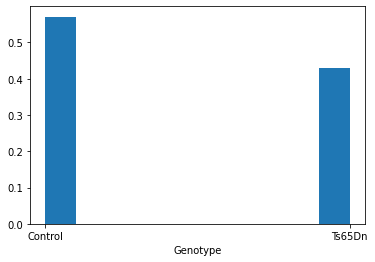

Control: 57.086614173228234 %
Ts65Dn: 42.91338582677279 %
(array([0.57086614, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.42913386]), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), <BarContainer object of 10 artists>)


In [12]:
# for genotype
weights=np.zeros_like(mousetrain_df['Genotype']) + 1. / (mousetrain_df['Genotype']).size
n = plt.hist(mousetrain_df['Genotype'], weights=weights)
plt.xlabel('Genotype')
plt.show()
print("Control: " + str(n[0][0]*100) + " %")
print("Ts65Dn: " + str(n[0][9]*100) + " %")

print(n)

The prior probabilities of genotype is 59.9% Control and 40% Ts65Dn.  
Since there is not much difference between the classes ,it is balanced.

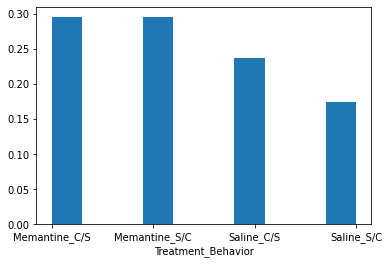

Memantine_C/S: 29.527559055118136 %
Memantine_S/C: 29.527559055118026 %
Saline_C/S: 23.622047244095114 %
Saline_S/C: 17.32283464566975 %
(array([0.29527559, 0.        , 0.        , 0.29527559, 0.        ,
       0.        , 0.23622047, 0.        , 0.        , 0.17322835]), array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]), <BarContainer object of 10 artists>)


In [13]:
# for Treatment_Behavior
weights=np.zeros_like(mousetrain_df['Treatment_Behavior']) + 1. / (mousetrain_df['Treatment_Behavior']).size
n = plt.hist(mousetrain_df['Treatment_Behavior'], weights=weights)
plt.xlabel('Treatment_Behavior')
plt.show()
print("Memantine_C/S: " + str(n[0][0]*100) + " %")
print("Memantine_S/C: " + str(n[0][3]*100) + " %")
print("Saline_C/S: " + str(n[0][6]*100) + " %")
print("Saline_S/C: " + str(n[0][9]*100) + " %")
print(n)

The prior probabilities of Treatment Probabilities is 26.67% Memantine_C/S,26.67% Memantine_S/C,26.67%Saline_C/S,20%Saline_S/C. 
Since there is not much difference between the classes ,it is balanced.

# Exploratory Data analysis:

In [14]:
#create a copy of train_df to do all the transformations
train_copy = mousetrain_df.copy()
train_copy.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine_C/S
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine_C/S
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine_C/S
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine_C/S
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine_C/S


**Numeric data interpretation:**

In [15]:
# collection of numeric type features into num_df dataframe
num_df = mousetrain_df.select_dtypes(include=['int64','float64']).copy()
num_df.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.205604,0.129954,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730


**Numeric data exploration:**
    

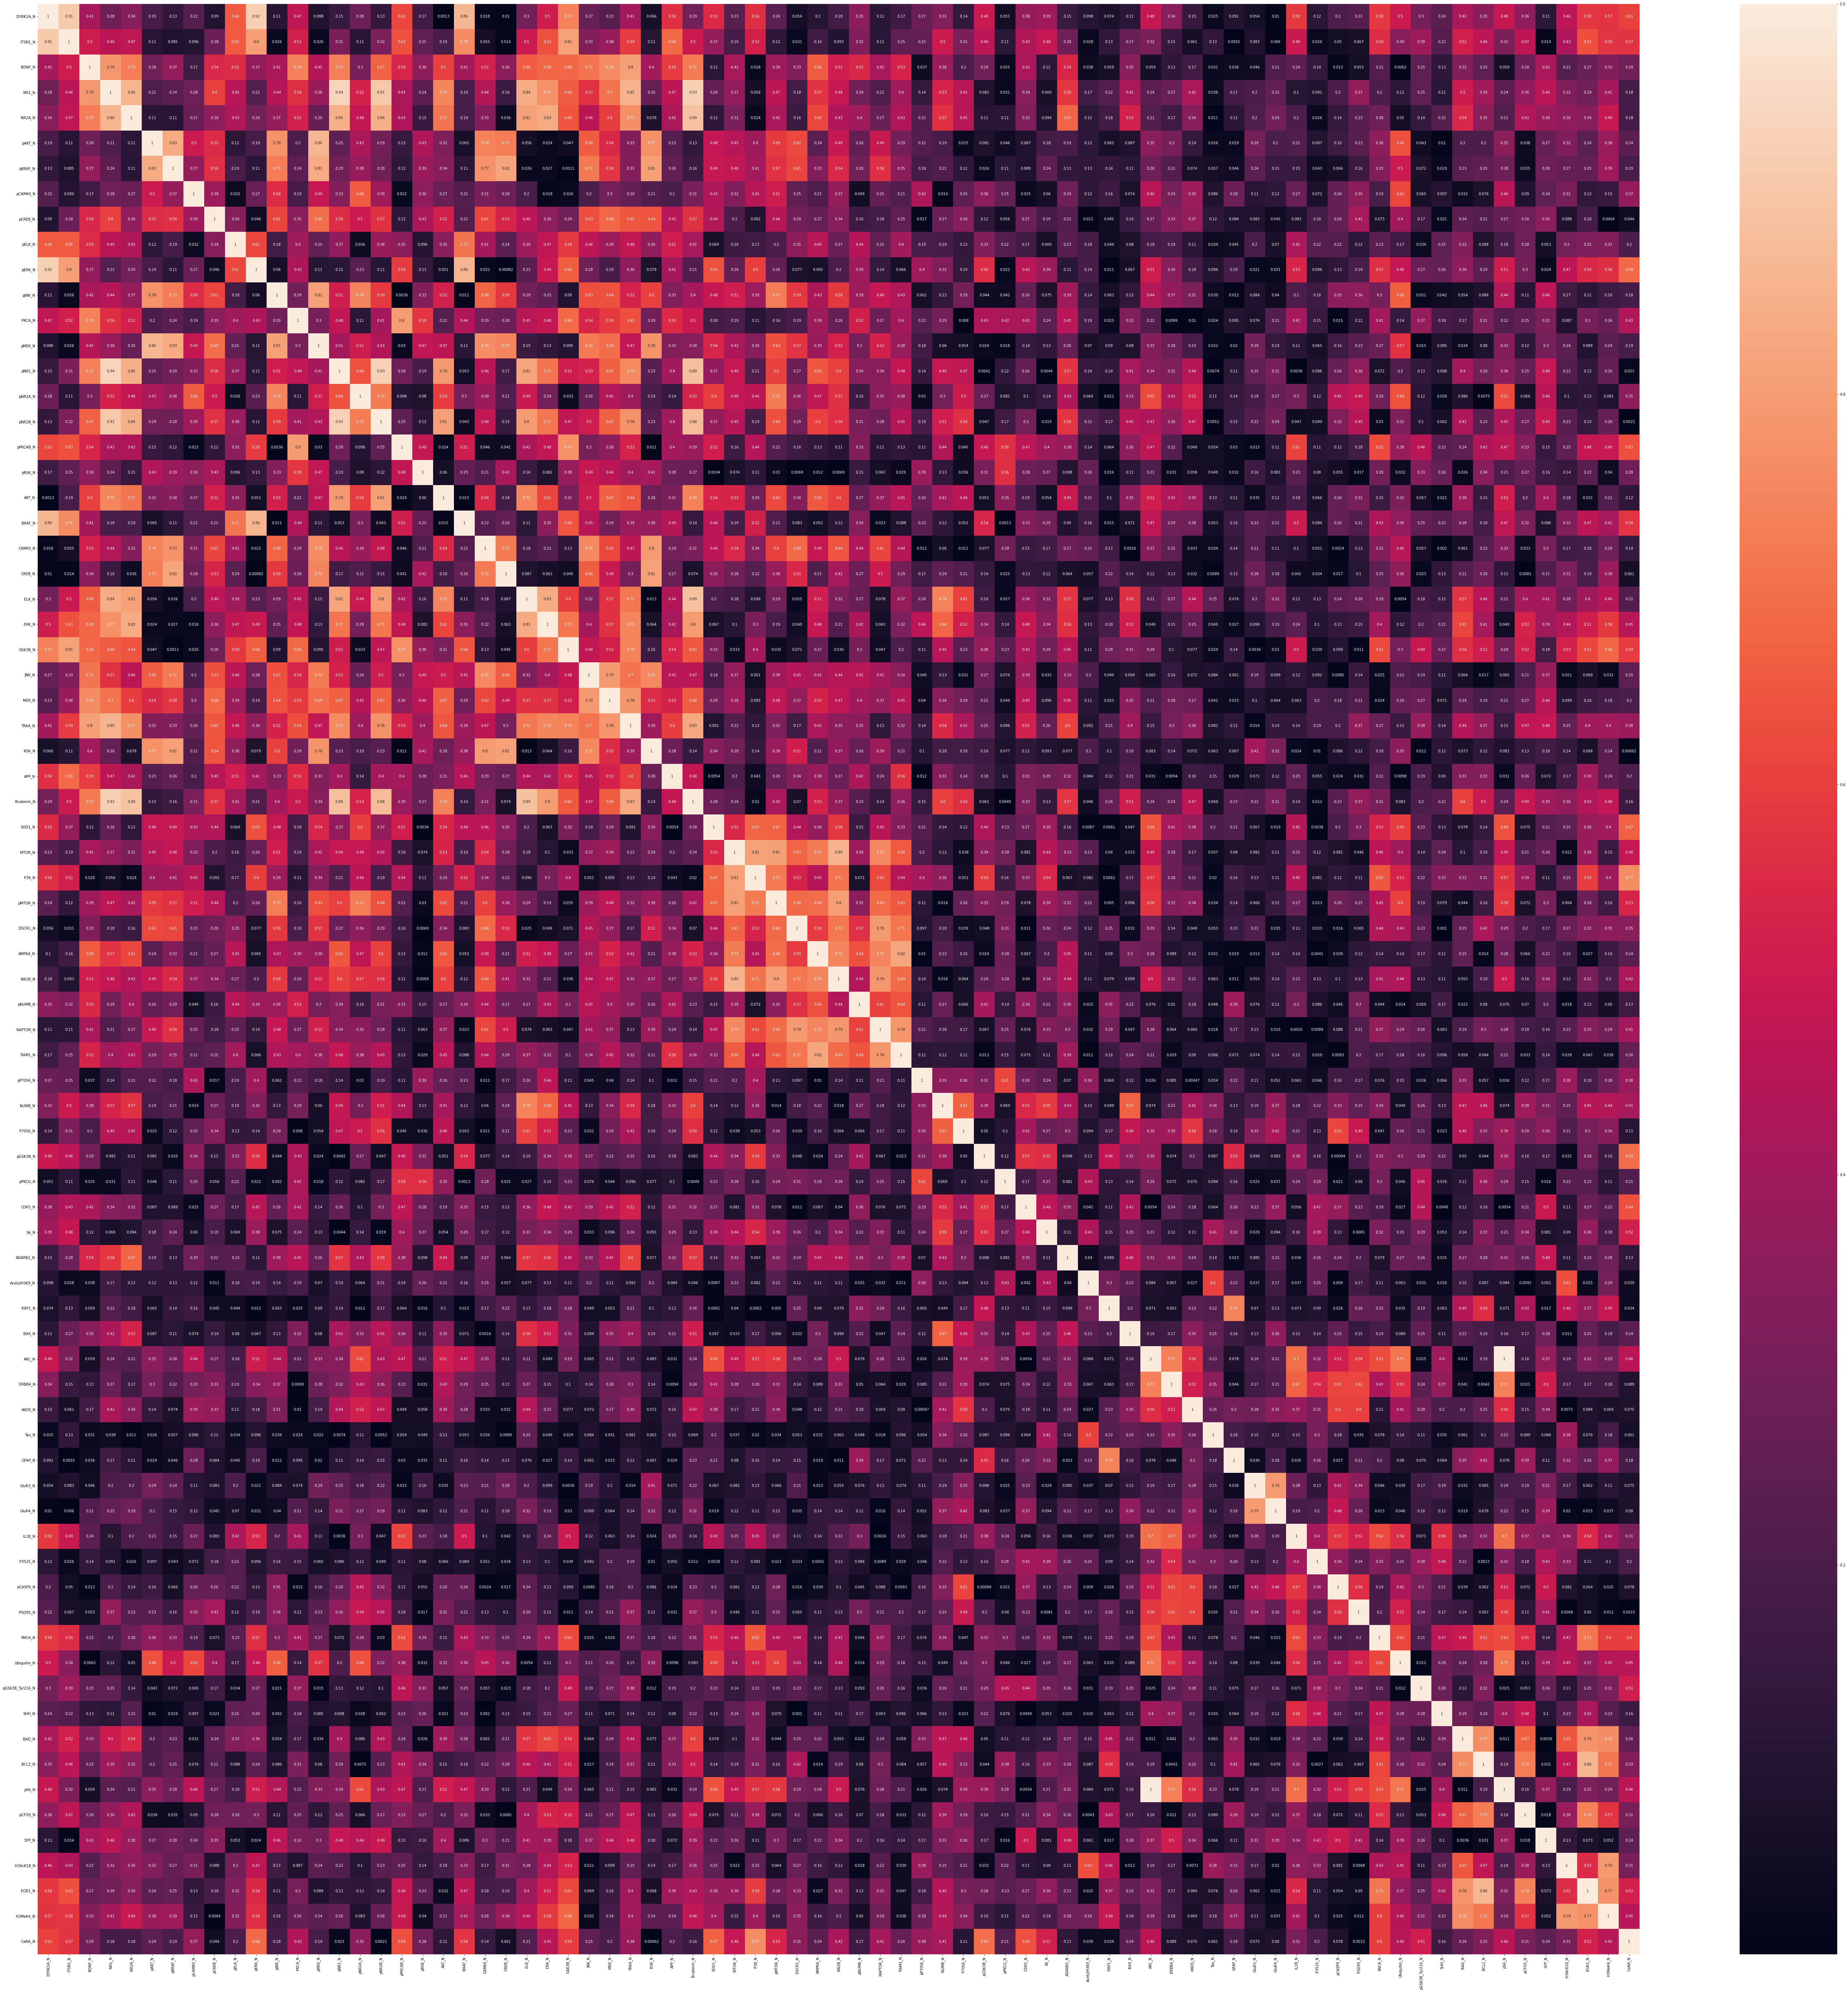

In [16]:
corrMatrix = num_df.corr(method= 'spearman')
fig, ax = plt.subplots(figsize=(100,100))
sns.heatmap(abs(corrMatrix), annot = True)
plt.show()

So now we are creating a square matrix with dimensions equal to the number of features. In which we will have the elements as the absolute value of correlation between the features.

In [17]:
cor_matrix = num_df.corr().abs()
print(cor_matrix)

           DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
DYRK1A_N   1.000000  0.961321  0.407110  0.314795  0.340011  0.182126   
ITSN1_N    0.961321  1.000000  0.495102  0.428745  0.421034  0.149509   
BDNF_N     0.407110  0.495102  1.000000  0.817986  0.746004  0.241501   
NR1_N      0.314795  0.428745  0.817986  1.000000  0.866667  0.185322   
NR2A_N     0.340011  0.421034  0.746004  0.866667  1.000000  0.076446   
...             ...       ...       ...       ...       ...       ...   
SYP_N      0.035929  0.039384  0.454025  0.486483  0.377628  0.199349   
H3AcK18_N  0.406055  0.354554  0.207555  0.253118  0.292016  0.317508   
EGR1_N     0.324198  0.403525  0.247121  0.287997  0.326056  0.313131   
H3MeK4_N   0.518361  0.558266  0.331191  0.404977  0.468892  0.372945   
CaNA_N     0.457907  0.495085  0.304098  0.205033  0.185840  0.245944   

            pBRAF_N  pCAMKII_N   pCREB_N    pELK_N  ...     SHH_N     BAD_N  \
DYRK1A_N   0.085401   0.158167  0.082463  0.

Note that Correlation matrix will be mirror image about the diagonal and all the diagonal elements will be 1. So, It does not matter that we select the upper triangular or lower triangular part of the correlation matrix but we should not include the diagonal elements. So we are selecting the upper traingular

In [18]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
print(upper_tri)

           DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
DYRK1A_N        NaN  0.961321  0.407110  0.314795  0.340011  0.182126   
ITSN1_N         NaN       NaN  0.495102  0.428745  0.421034  0.149509   
BDNF_N          NaN       NaN       NaN  0.817986  0.746004  0.241501   
NR1_N           NaN       NaN       NaN       NaN  0.866667  0.185322   
NR2A_N          NaN       NaN       NaN       NaN       NaN  0.076446   
...             ...       ...       ...       ...       ...       ...   
SYP_N           NaN       NaN       NaN       NaN       NaN       NaN   
H3AcK18_N       NaN       NaN       NaN       NaN       NaN       NaN   
EGR1_N          NaN       NaN       NaN       NaN       NaN       NaN   
H3MeK4_N        NaN       NaN       NaN       NaN       NaN       NaN   
CaNA_N          NaN       NaN       NaN       NaN       NaN       NaN   

            pBRAF_N  pCAMKII_N   pCREB_N    pELK_N  ...     SHH_N     BAD_N  \
DYRK1A_N   0.085401   0.158167  0.082463  0.

Now we are selecting the columns which are having absolute correlation greater than 0.9 and making a list of those columns named 'to_drop'.

In [20]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
print(); print(to_drop)


['ITSN1_N', 'pERK_N', 'pNR1_N', 'pNR2B_N', 'BRAF_N', 'Bcatenin_N', 'pS6_N']


Now we are dropping the columns from 'to_drop' which are highly correlated

In [21]:
num_df=num_df.drop(['ITSN1_N', 'pERK_N', 'pNR1_N', 'pNR2B_N', 'BRAF_N', 'pS6_N', 'Bcatenin_N'], axis=1)

In [22]:
num_df.head()

,DYRK1A_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pJNK_N,...,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.306382,...,0.831557,0.188852,0.122652,NaN,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.299051,...,0.849270,0.200404,0.116682,NaN,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.291276,...,0.846709,0.193685,0.118508,NaN,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.296729,...,0.833277,0.192112,0.132781,NaN,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.286961,...,0.878668,0.205604,0.129954,NaN,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730


In [23]:
num_df.values

array([[0.50364388, 0.4301753 , 2.81632854, ..., 0.13179003, 0.1281856 ,
        1.67565235],
       [0.51461708, 0.41177034, 2.78951404, ..., 0.13510297, 0.1311187 ,
        1.74360965],
       [0.50918309, 0.41830878, 2.68720107, ..., 0.13336183, 0.12743108,
        1.92642659],
       ...,
       [0.38218182, 0.31854545, 2.072     , ..., 0.16364894, 0.19121209,
        1.43351401],
       [0.3656217 , 0.29799225, 2.00493131, ..., 0.1406397 , 0.21389934,
        1.54327375],
       [0.36560487, 0.30153901, 2.06281317, ..., 0.16626766, 0.2061288 ,
        1.52011013]])

**Data Impuatation and Now we are replacing all NaN values with mean**

In [24]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(random_state=42)
imputed = imputer.fit_transform(num_df)
num_df = pd.DataFrame(imputed, columns=num_df.columns)

Iterative Imputation

reference: https://towardsdatascience.com/iterative-imputation-with-scikit-learn-8f3eb22b1a38

In [25]:
num_df
print(np.shape(num_df))

(762, 70)


In [26]:
num_df.isna().sum()

DYRK1A_N     0
BDNF_N       0
NR1_N        0
NR2A_N       0
pAKT_N       0
            ..
SYP_N        0
H3AcK18_N    0
EGR1_N       0
H3MeK4_N     0
CaNA_N       0
Length: 70, dtype: int64

In [27]:
num_df.insert(62,'Genotype',mousetrain_df['Genotype'])
print(np.shape(num_df))

(762, 71)


In [28]:
num_df.insert(63,'Treatment_Behavior',mousetrain_df['Treatment_Behavior'])
print(np.shape(num_df))

(762, 72)


In [29]:
display(num_df)

,DYRK1A_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pJNK_N,...,Genotype,Treatment_Behavior,BAD_N,BCL2_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.306382,...,Control,Memantine_C/S,0.122652,0.111739,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.299051,...,Control,Memantine_C/S,0.116682,0.112247,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.291276,...,Control,Memantine_C/S,0.118508,0.111092,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.296729,...,Control,Memantine_C/S,0.132781,0.120551,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.286961,...,Control,Memantine_C/S,0.129954,0.120262,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.394169,0.316564,2.104045,3.314706,0.234529,0.200657,3.208804,0.221809,1.218951,0.317851,...,Ts65Dn,Saline_S/C,0.156371,0.110916,0.115567,0.441207,0.148473,0.146192,0.190681,1.474465
758,0.401739,0.321841,2.183930,3.411782,0.236546,0.190826,3.384350,0.231899,1.250487,0.329786,...,Ts65Dn,Saline_S/C,0.153224,0.110350,0.108944,0.444913,0.153137,0.149798,0.197944,1.516605
759,0.382182,0.318545,2.072000,3.073636,0.259636,0.202727,3.006364,0.223455,1.248727,0.354545,...,Ts65Dn,Saline_S/C,0.166417,0.133664,0.114635,0.422789,0.148426,0.163649,0.191212,1.433514
760,0.365622,0.297992,2.004931,2.783551,0.245333,0.190384,2.948221,0.217506,1.177527,0.325819,...,Ts65Dn,Saline_S/C,0.158631,0.136994,0.120649,0.459901,0.146872,0.140640,0.213899,1.543274


In [19]:
#Encoding the categorical features into numeric values 
label_encoder = preprocessing.LabelEncoder()
num_df['Genotype']= label_encoder.fit_transform(train_copy['Genotype'])
num_df['Treatment_Behavior']= label_encoder.fit_transform(train_copy['Treatment_Behavior'])

In [20]:
##Encoding the categorical features into numeric values
label_encoder = preprocessing.LabelEncoder()
train_copy['Genotype']= label_encoder.fit_transform(train_copy['Genotype'])
train_copy['Treatment_Behavior']= label_encoder.fit_transform(train_copy['Treatment_Behavior'])

In [32]:
display(train_copy)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,0,0
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,0,0
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,0,0
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,0,0
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.394169,0.623696,0.316564,2.104045,3.314706,0.234529,0.200657,3.208804,0.221809,1.218951,...,0.110916,0.119428,0.115567,0.441207,0.148473,0.146192,0.190681,1.474465,1,3
758,0.401739,0.659571,0.321841,2.183930,3.411782,0.236546,0.190826,3.384350,0.231899,1.250487,...,0.110350,0.118081,0.108944,0.444913,0.153137,0.149798,0.197944,1.516605,1,3
759,0.382182,0.586545,0.318545,2.072000,3.073636,0.259636,0.202727,3.006364,0.223455,1.248727,...,0.133664,0.116134,0.114635,0.422789,0.148426,0.163649,0.191212,1.433514,1,3
760,0.365622,0.572209,0.297992,2.004931,2.783551,0.245333,0.190384,2.948221,0.217506,1.177527,...,0.136994,0.120649,0.120649,0.459901,0.146872,0.140640,0.213899,1.543274,1,3


In [33]:
#Normalizing the data
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

scaler.fit(train_copy.drop(['Genotype','Treatment_Behavior'],axis=1))
train_X = pd.DataFrame(scaler.transform(train_copy.drop(['Genotype','Treatment_Behavior'],axis=1)))

display(train_X)
print(np.shape(train_X))

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
0,0.239745,0.428489,2.372452,1.471921,2.269552,-0.351734,-0.186528,-0.898820,0.648744,0.595213,...,-1.269701,-1.124454,NaN,-1.058433,-0.935932,-0.371984,-0.865336,-1.205963,-1.341874,0.943046
1,0.279648,0.216934,1.976690,1.393675,1.940975,-0.533878,-0.365510,-0.963191,0.479587,0.292333,...,-0.878703,-1.321655,NaN,-1.039198,-1.112149,-0.139388,-0.912791,-1.126899,-1.291362,1.144768
2,0.259888,0.366815,2.117287,1.095124,1.873152,-0.600347,-0.256006,-0.970144,0.585066,0.223626,...,-1.106122,-1.261336,NaN,-0.924510,-1.028703,-0.232612,-0.914322,-1.168452,-1.354868,1.687436
3,0.015969,-0.045054,0.833934,0.452418,1.181185,-0.249043,-0.228099,-1.073520,-0.163587,0.289803,...,-1.159352,-0.789860,NaN,-1.267675,-0.807681,-0.940673,-0.601482,-0.832372,-1.019571,1.016991
4,-0.010091,-0.043766,0.837716,0.157224,0.900303,-0.496664,-0.334981,-1.087947,-0.641792,0.111757,...,-0.702678,-0.883247,NaN,-1.160421,-0.832578,-0.258680,-0.802874,-1.002529,-0.994103,1.430089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,-0.158354,-0.020962,-0.070527,-0.606540,-0.611634,0.045756,0.683866,-0.240028,0.313292,-0.447289,...,-0.346465,-0.010637,-0.880087,-0.178772,-0.618996,-0.145392,-0.296319,-0.862264,-0.265629,0.345848
758,-0.130826,0.109601,0.042935,-0.373432,-0.507093,0.096829,0.313293,-0.101537,0.638293,-0.385489,...,-0.563470,-0.114567,-0.899219,-0.269046,-0.909280,-0.085877,-0.217556,-0.776199,-0.140549,0.470936
759,-0.201944,-0.156166,-0.027925,-0.700047,-0.871242,0.681455,0.761884,-0.399737,0.366285,-0.388938,...,-0.510605,0.321214,-0.111756,-0.399556,-0.659841,-0.441216,-0.297119,-0.445640,-0.256482,0.224291
760,-0.262164,-0.208343,-0.469880,-0.895755,-1.183635,0.319300,0.296632,-0.445606,0.174685,-0.528465,...,-0.979130,0.064036,0.000732,-0.096908,-0.396241,0.154848,-0.323361,-0.994763,0.134219,0.550098


(762, 77)


Normalize Data (shift and scale so that columns are zero mean and unit variance)

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [34]:
#Normalizing training data
cols_to_include =[]
for column in num_df:
    cols_to_include.append(column)

In [35]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

scaler.fit(num_df.drop(['Genotype','Treatment_Behavior'],axis=1))
train_X = pd.DataFrame(scaler.transform(num_df.drop(['Genotype','Treatment_Behavior'],axis=1)))

display(train_X)
print(np.shape(train_X))

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,0.239745,2.372452,1.471921,2.269552,-0.351734,-0.186528,-0.898820,0.648744,0.595213,-0.148771,...,-0.158189,-1.269701,-1.193053,-0.895409,-0.907487,-0.371984,-0.725426,-1.246045,-1.442720,0.943046
1,0.279648,1.976690,1.393675,1.940975,-0.533878,-0.365510,-0.963191,0.479587,0.292333,-0.292219,...,0.025901,-0.878703,-1.384937,-0.879113,-1.079968,-0.139388,-0.758520,-1.176220,-1.391014,1.144768
2,0.259888,2.117287,1.095124,1.873152,-0.600347,-0.256006,-0.970144,0.585066,0.223626,-0.444364,...,-0.000721,-1.106122,-1.326244,-0.916217,-0.998291,-0.232612,-0.759587,-1.212917,-1.456021,1.687436
3,0.015969,0.833934,0.452418,1.181185,-0.249043,-0.228099,-1.073520,-0.163587,0.289803,-0.337665,...,-0.140312,-1.159352,-0.867478,-0.612215,-0.781955,-0.940673,-0.541428,-0.916111,-1.112796,1.016991
4,-0.010091,0.837716,0.157224,0.900303,-0.496664,-0.334981,-1.087947,-0.641792,0.111757,-0.528799,...,0.331411,-0.702678,-0.958348,-0.621512,-0.806325,-0.258680,-0.681868,-1.066383,-1.086726,1.430089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,-0.158354,-0.070527,-0.606540,-0.611634,0.045756,0.683866,-0.240028,0.313292,-0.447289,0.075654,...,1.606940,-0.346465,-0.109259,-0.921869,-0.597271,-0.145392,-0.328622,-0.942509,-0.341027,0.345848
758,-0.130826,0.042935,-0.373432,-0.507093,0.096829,0.313293,-0.101537,0.638293,-0.385489,0.309205,...,2.043400,-0.563470,-0.210387,-0.940073,-0.881400,-0.085877,-0.273696,-0.866502,-0.212989,0.470936
759,-0.201944,-0.027925,-0.700047,-0.871242,0.681455,0.761884,-0.399737,0.366285,-0.388938,0.793714,...,1.060202,-0.510605,0.213647,-0.190815,-0.637250,-0.441216,-0.329180,-0.574571,-0.331664,0.224291
760,-0.262164,-0.469880,-0.895755,-1.183635,0.319300,0.296632,-0.445606,0.174685,-0.528465,0.231584,...,1.549577,-0.979130,-0.036599,-0.083785,-0.379239,0.154848,-0.347480,-1.059525,0.068276,0.550098


(762, 70)


In [36]:
#Normalizing test data
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

scaler.fit(mousetest_df.drop(['Genotype','Treatment_Behavior'],axis=1))
test_X = pd.DataFrame(scaler.transform(mousetest_df.drop(['Genotype','Treatment_Behavior'],axis=1)))

display(test_X)
print(np.shape(test_X))

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
0,1.100803,1.740822,2.583259,1.974701,2.394221,-0.582594,0.365164,-1.376292,0.822835,1.063762,...,-0.516397,-0.892164,-0.445887,2.198671,-0.483470,1.412221,-0.847985,-0.694989,-1.799075,1.208813
1,1.225392,1.779810,2.915630,2.144586,2.459251,-0.467399,0.462236,-1.332976,1.602315,1.480666,...,-0.142017,-0.658032,-0.055884,2.111312,-0.182021,1.207686,-0.735320,-0.578044,-1.763522,1.168194
2,1.189037,1.805485,3.009620,2.367066,2.407598,-0.413003,0.263538,-1.357593,1.595749,1.992142,...,0.037499,-0.989105,-0.526272,1.758871,-0.174812,0.969971,-0.823243,-0.646670,-1.935619,0.894561
3,0.788419,1.033239,1.595803,1.086687,2.278297,-0.106337,0.172848,-0.821312,0.149973,0.860422,...,-0.664581,-0.321311,-0.632931,1.515133,-0.230526,1.686461,-0.816038,-0.738978,-1.339482,1.327924
4,0.887416,1.290601,1.923244,1.501161,2.493537,0.022067,0.493524,-0.757459,0.423275,1.159789,...,-0.447700,-0.232404,0.441489,1.571069,-0.464649,1.326581,-0.576095,-0.203798,-1.389865,1.247124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,-1.008066,-1.040136,-1.076567,-2.055177,-2.001432,-0.802076,-0.871643,-0.956547,-1.124435,-1.772423,...,1.798059,1.661547,1.027669,0.156378,0.026967,-0.475503,1.510639,0.963957,1.836153,-0.598727
221,-0.828023,-0.799506,-0.560376,-1.470007,-1.571760,-0.106214,0.041258,-0.655581,-0.581492,-1.381017,...,1.624208,1.169628,0.794527,-0.068511,-0.069003,-0.377369,1.516703,0.823382,1.208578,-0.677766
222,-1.064726,-1.196290,-1.205792,-2.411096,-2.134322,-0.600705,-0.783159,-1.219725,-1.200692,-1.907260,...,2.196109,1.971494,1.604079,-0.156688,0.482846,-0.059510,2.107842,1.486392,2.224344,-0.667209
223,-1.084540,-1.166913,-1.254841,-2.367244,-2.050418,-0.661345,-1.058192,-1.231263,-1.403294,-1.765824,...,1.843362,1.706568,1.852754,0.047974,0.708795,-0.540583,1.885667,1.460993,2.292366,-0.776149


(225, 77)


Model Training
Following models are used:

Elastic Net Logistic regression for simplest classification.

Support Vector matrix(SVM)

Random Forest

Neural Networks, since it trains the weight to cover most of the non-linearit

In [37]:
Y=np.array(num_df.loc[:,'Genotype':'Treatment_Behavior'])
Y.shape

(762, 2)

In [38]:
# train and validation split on train_df dataframe
from sklearn.model_selection import train_test_split
X_train,X_validation,y_train,y_validation=train_test_split(train_X, Y,test_size=0.2, random_state=5, stratify=Y)

In [39]:
train_X1=X_train
train_X1.shape


(609, 70)

# Elastic net logistic regression (L1 and L2 weight)

In [40]:
#model accuracy on training data 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
# define the elasctic net  logistic regression model
model = LogisticRegression(C=0.53, penalty="elasticnet", solver="saga", l1_ratio=0.7,max_iter=1000)
# define the 5-fold cross validation procedure
cv = KFold(n_splits=5,shuffle=False)
# evaluate the model and collect the scores
train_Y1=y_train[:,0]
n_scores = cross_val_score(model, train_X1, train_Y1, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy for Genotype:' + str(np.mean(n_scores)) + str(np.std(n_scores)))
train_Y2=y_train[:,1]
n_scores = cross_val_score(model, train_X1, train_Y2, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy for Treatment_Behavior:' + str(np.mean(n_scores)) + str(np.std(n_scores)))


Mean Accuracy for Genotype:0.96721311475409840.02007778477691129
Mean Accuracy for Treatment_Behavior:0.97866142799078730.017648812078199298


In [41]:
# Training on the entire data set for binary class
from sklearn.linear_model import LogisticRegression
train_Y1=y_train[:,0]
clf_1 = LogisticRegression(C=0.53, penalty="elasticnet", solver="saga", l1_ratio=0.7,max_iter=1000).fit(train_X1, train_Y1)
y_lr = clf_1.predict(train_X1)
clf_1.score(train_X1, np.ravel(train_Y1))

0.9819376026272578

In [42]:
# Training on the entire data set for multi-class
from sklearn.linear_model import LogisticRegression
train_Y2=y_train[:,1]
clf_2 = LogisticRegression(C=0.53, penalty="elasticnet", solver="saga", l1_ratio=0.7,max_iter=1000).fit(train_X1, train_Y2)
y_lr = clf_2.predict(train_X1)
clf_2.score(train_X1, np.ravel(train_Y2))

0.9983579638752053

Relative Importance of Features Genotype

Feature: 0, Score: 0.28462
Feature: 1, Score: -0.24442
Feature: 2, Score: -0.72790
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.31390
Feature: 5, Score: 0.00000
Feature: 6, Score: -0.61459
Feature: 7, Score: 0.09548
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.13533
Feature: 11, Score: -0.14769
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: -0.06866
Feature: 15, Score: 0.00000
Feature: 16, Score: -0.06113
Feature: 17, Score: -0.29376
Feature: 18, Score: -0.77884
Feature: 19, Score: -1.72377
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.08996
Feature: 23, Score: 2.06262
Feature: 24, Score: 0.00000
Feature: 25, Score: 2.48207
Feature: 26, Score: 0.00000
Feature: 27, Score: -1.38374
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.69802
Feature: 31, Score: -1.00586
Feature: 32, Score: -0.29060
Feature: 33, Score: -0.79755
Feature: 34, Score: -0.10186
Feature: 35, Sco

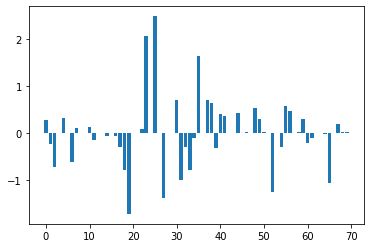

In [43]:
importance = clf_1.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [44]:
# Feature Slection for genotype
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

# Create the RFE object and compute a cross-validated score.
ENLC = LogisticRegression(C=0.53, penalty="elasticnet", solver="saga", l1_ratio=0.7,max_iter=1000)
# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select = 1  # Minimum number of features to consider
cv=StratifiedKFold(5)
SV = RFECV(estimator=ENLC,step=1,cv=cv,scoring="accuracy",min_features_to_select=1)
SV.fit(train_X1,train_Y1)

print("Optimal number of features : %d" % SV.n_features_)
SV.get_feature_names_out()

Optimal number of features : 33


array(['x0', 'x1', 'x2', 'x4', 'x6', 'x11', 'x17', 'x18', 'x19', 'x23',
       'x25', 'x27', 'x30', 'x31', 'x32', 'x33', 'x35', 'x37', 'x38',
       'x39', 'x40', 'x41', 'x44', 'x48', 'x49', 'x52', 'x54', 'x55',
       'x56', 'x59', 'x60', 'x65', 'x67'], dtype=object)

Recursive feature elimination

https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py

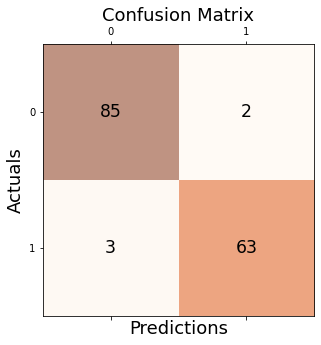

In [45]:
#confusion matrix before feature selection on validation data for binary class 
from sklearn.metrics import confusion_matrix
ENLR = LogisticRegression(C=0.53, penalty="elasticnet", solver="saga", l1_ratio=0.7,max_iter=1000)
ENLR.fit(train_X1, y_train[:,0])
y_pred = ENLR.predict(X_validation)
conf_matrix = confusion_matrix(y_true=y_validation[:,0], y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.5)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()



In [46]:
##metrics for binary classification
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
print('Precision: %.3f' % precision_score(y_validation[:,0], y_pred))
print('Recall: %.3f' % recall_score(y_validation[:,0], y_pred))
print('Accuracy: %.3f' % accuracy_score(y_validation[:,0], y_pred))
print('F1 Score: %.3f' % f1_score(y_validation[:,0], y_pred))

Precision: 0.969
Recall: 0.955
Accuracy: 0.967
F1 Score: 0.962


Confusion matrix:

 https://scikit-learn.org/stable/modules/generated/sklearn.metrics confusion_matrix.html?highlight=confusion%20matrix#sklearn.metrics.confusion_matrix

 https://www.google.com/amp/s/www.dataschool.io/simple-guide-to-confusion-matrix-terminology/amp/


Evaluation  of Metrics for classification model:

https://www.analyticsvidhya.com/blog/2020/10/how-to-choose-evaluation-metrics-for-classification-model/

Relative Importance of Features treatment Behaviour

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.28820
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.87326
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: -0.42210
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.14378
Feature: 10, Score: 0.19159
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.14513
Feature: 15, Score: 0.00000
Feature: 16, Score: -0.79368
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.27951
Feature: 22, Score: -0.81224
Feature: 23, Score: 0.70611
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.65702
Feature: 26, Score: -1.31061
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.12375
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: -0.118

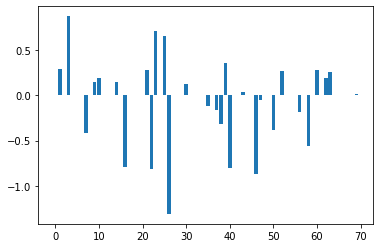

In [47]:
importance = clf_2.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [48]:
# Feature Slection for multi-class
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV

# Create the RFE object and compute a cross-validated score.
ENLC = LogisticRegression(C=0.53, penalty="elasticnet", solver="saga", l1_ratio=0.7,max_iter=1000)
# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select = 1  # Minimum number of features to consider
cv = KFold(n_splits=5,shuffle=False)
SV = RFECV(estimator=ENLC,step=1,cv=cv,scoring="accuracy",min_features_to_select=1)
SV.fit(train_X1,train_Y2)

print("Optimal number of features : %d" % SV.n_features_)
SV.get_feature_names_out()

Optimal number of features : 50


array(['x0', 'x1', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x13', 'x15',
       'x16', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25',
       'x26', 'x27', 'x28', 'x29', 'x30', 'x32', 'x33', 'x35', 'x36',
       'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x46', 'x48', 'x49',
       'x50', 'x51', 'x52', 'x54', 'x55', 'x56', 'x58', 'x59', 'x60',
       'x63', 'x66', 'x69'], dtype=object)

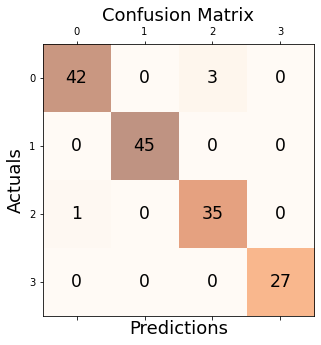

In [49]:
#confusion matrix before feature selection on validation data for multi-class classification
from sklearn.metrics import confusion_matrix
ENLR = LogisticRegression(C=0.53, penalty="elasticnet", solver="saga", l1_ratio=0.7,max_iter=1000)
ENLR.fit(train_X1, y_train[:,1])
y1_pred = ENLR.predict(X_validation)
conf_matrix = confusion_matrix(y_true=y_validation[:,1], y_pred=y1_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.5)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


In [50]:
#metrics for multi-class classification
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
print('Precision: %.3f' % precision_score(y_validation[:,1], y1_pred,average ='weighted',zero_division=0))
print('Recall: %.3f' % recall_score(y_validation[:,1], y1_pred,average ='weighted'))
print('Accuracy: %.3f' % accuracy_score(y_validation[:,1], y1_pred))
print('F1 Score: %.3f' % f1_score(y_validation[:,1], y1_pred,average ='weighted'))

Precision: 0.975
Recall: 0.974
Accuracy: 0.974
F1 Score: 0.974


Observations:
Considering all the optimal features in Genotype and Treatment Behaviour, we get total 24 features.

In [51]:
X_train_feat_1= train_X1.iloc[:, [0,1,4,6,18,19,23,25,27,30,32,33,35,37,38,39,40,41,48,49,52,54,55,56,59,60]]
print(X_train_feat_1)

           0         1         4         6         18        19        23  \
520 -0.144682  0.249564  0.396939 -0.050710 -0.683689 -0.681227  0.462768   
148 -0.563077 -0.046378  1.978114  1.455339 -0.752581 -1.211936 -0.466092   
221 -0.595401 -0.045496  1.141862  0.795267 -0.514522 -0.443783  0.170844   
556 -0.411826  0.302128  0.268005 -0.203377  0.385193 -0.060385  0.168487   
439  1.373799  0.346891 -0.376046 -0.964000  0.026345  0.120966  0.634694   
..        ...       ...       ...       ...       ...       ...       ...   
71  -0.031211 -1.320613 -0.472121 -0.274476 -0.859770 -0.888417 -0.786127   
13  -0.202930 -0.191227 -0.175269 -1.581029 -1.110007 -0.820092 -0.985081   
230 -0.219377  1.530025  0.295395 -0.190574  1.115338  1.396200  0.903019   
306 -0.116029 -0.716591 -0.796171 -0.663976 -0.252777 -0.041975 -0.309544   
673 -0.166273 -0.707937  2.330371 -0.899496 -0.859779 -0.287985 -0.164193   

           25        27        30  ...        40        41        48  \
520

In [52]:
X_validation_1 = X_validation.iloc[:, [0,1,4,6,18,19,23,25,27,30,32,33,35,37,38,39,40,41,48,49,52,54,55,56,59,60]]
display(X_validation_1)

,0,1,4,6,18,19,23,25,27,30,...,40,41,48,49,52,54,55,56,59,60
177,-0.617081,0.019581,0.189420,0.931286,-0.757840,-1.444554,-1.102330,0.075972,0.458792,1.129950,...,0.145447,1.024344,-1.698253,-0.911431,0.927704,0.628025,-0.314203,0.520224,0.801343,-0.527723
53,-0.396414,-0.514644,-0.099785,0.158624,-0.518717,0.363529,-0.337901,-0.596851,0.060625,0.599550,...,-1.438809,0.985375,1.187938,-0.466926,0.608062,1.529775,1.330309,0.875588,0.299486,-0.078485
573,-0.405123,0.642519,0.751344,1.203719,0.770296,1.223582,1.246489,1.434314,0.596542,0.922526,...,-0.379676,-0.242296,1.609767,1.421157,-0.289203,0.501091,0.250403,0.302835,1.015965,0.215468
693,0.024287,-0.537884,-1.415147,-0.723037,0.326240,-0.422680,-0.209453,0.512562,-2.885482,-3.455618,...,2.117669,0.694534,-0.554180,0.411625,0.323502,-0.328302,0.716917,-0.503599,-0.613705,-0.036539
320,0.060119,0.316670,0.621323,0.359177,-0.473517,0.291461,0.273353,-0.278147,-0.456160,0.179655,...,-1.318726,0.640679,-0.959102,-1.492412,-0.924053,-1.607908,-1.682538,-1.148343,-0.387933,-1.986179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,-0.928009,-1.938194,-1.465984,-0.603618,-0.455319,-1.493285,-2.037711,-2.345335,-1.292495,-1.395505,...,-0.867006,-1.310845,1.209447,-0.497875,0.773083,1.779716,-0.958181,-0.280852,-0.558444,-1.376403
109,1.079009,1.463674,0.211378,1.372563,0.468675,0.874234,1.175900,0.793044,0.639369,-0.602896,...,0.472399,1.361252,0.004846,0.367374,-0.195815,-0.434894,0.391824,-0.005373,-0.147361,0.972155
130,-0.445741,0.136888,1.082837,1.163528,-0.584952,-0.663415,0.041747,-0.254104,1.523618,0.194210,...,-0.230835,0.555406,0.309220,0.273810,1.194167,1.089488,-0.130239,0.499934,1.333218,0.113200
260,5.744070,1.085717,-0.664570,-0.345043,0.578330,1.325678,0.939550,0.046675,-0.546492,-0.482822,...,-0.455648,1.016025,-1.092255,-0.395375,-0.003418,-0.889019,-0.454717,-0.909428,-2.334912,3.113571


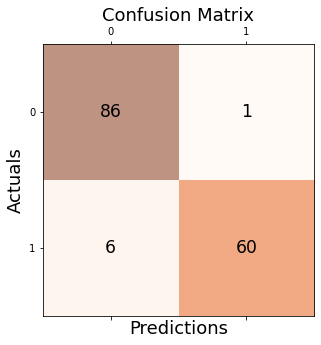

In [53]:
##confusion matrix after feature selection on validation data for binary class 
min_features_to_select = 10  # Minimum number of features to consider
from sklearn.metrics import confusion_matrix
ENLR = LogisticRegression(C=0.53, penalty="elasticnet", solver="saga", l1_ratio=0.7,max_iter=1000)
ENLR.fit(X_train_feat_1, y_train[:,0])
y_pred = ENLR.predict(X_validation_1)
conf_matrix = confusion_matrix(y_true=y_validation[:,0], y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.5)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [54]:
#metrics for binary class classification
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
print('Precision: %.3f' % precision_score(y_validation[:,0], y_pred))
print('Recall: %.3f' % recall_score(y_validation[:,0], y_pred))
print('Accuracy: %.3f' % accuracy_score(y_validation[:,0], y_pred))
print('F1 Score: %.3f' % f1_score(y_validation[:,0], y_pred))

Precision: 0.984
Recall: 0.909
Accuracy: 0.954
F1 Score: 0.945


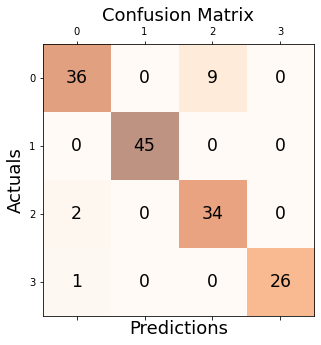

In [55]:
#confusion matrix after feature selection on validation data for binary class
from sklearn.metrics import confusion_matrix
ENLR = LogisticRegression(C=0.53, penalty="elasticnet", solver="saga", l1_ratio=0.7,max_iter=1000)
ENLR.fit(X_train_feat_1, y_train[:,1])
y_pred = ENLR.predict(X_validation_1)
conf_matrix = confusion_matrix(y_true=y_validation[:,1], y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.5)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [56]:
#metrics for multi-class classification
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
print('Precision: %.3f' % precision_score(y_validation[:,1],y_pred,average='weighted'))
print('Recall: %.3f' % recall_score(y_validation[:,1], y_pred,average='weighted'))
print('Accuracy: %.3f' % accuracy_score(y_validation[:,1], y_pred))
print('F1 Score: %.3f' % f1_score(y_validation[:,1], y_pred,average='weighted'))

Precision: 0.928
Recall: 0.922
Accuracy: 0.922
F1 Score: 0.922


Metrics values are less for validation data after feature reduction for both binary and multi-class classification.

Considering metrics before feature reduction for comparison to choose best model.

# SVM 

In [57]:
#model accuracy on training data 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.svm import SVC
# define the SVM model
model = SVC(kernel='linear', C=1.0, gamma='auto')
# define the 5-fold cross validation procedure
cv = KFold(n_splits=5,shuffle=False)
# evaluate the model and collect the scores
train_Y1 = y_train[:,0]
n_scores = cross_val_score(model, train_X1, train_Y1, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy for Genotype:' + str(np.mean(n_scores)) + str(np.std(n_scores)))
train_Y2 =y_train[:,1]
n_scores = cross_val_score(model, train_X1, train_Y2, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy:' + str(np.mean(n_scores)) + str(np.std(n_scores)))


Mean Accuracy for Genotype:0.97047825497900020.013296425835370095
Mean Accuracy:0.99178973038883610.007331420492107517


In [58]:
# Training on the entire data set

from sklearn.svm import SVC
clf_2 =SVC(kernel='linear', C=0.7, gamma='auto').fit(train_X1, train_Y1)
y_lr_2 = clf_2.predict(train_X1)
clf_2.score(train_X1, np.ravel(train_Y1))

0.9901477832512315

In [59]:
# Training on the entire data set

from sklearn.svm import SVC
clf_3 =SVC(kernel='linear', C=0.4,gamma='auto').fit(train_X1, train_Y2)
y_lr_3 = clf_3.predict(train_X1)
clf_3.score(train_X1, np.ravel(train_Y2))

1.0

Feature: 0, Score: 0.64229
Feature: 1, Score: -0.33942
Feature: 2, Score: -0.50733
Feature: 3, Score: -0.05213
Feature: 4, Score: 0.45107
Feature: 5, Score: -0.01153
Feature: 6, Score: -0.53909
Feature: 7, Score: 0.42834
Feature: 8, Score: 0.11214
Feature: 9, Score: -0.01041
Feature: 10, Score: 0.68746
Feature: 11, Score: -0.37540
Feature: 12, Score: 0.19362
Feature: 13, Score: -0.25213
Feature: 14, Score: -0.07229
Feature: 15, Score: 0.40241
Feature: 16, Score: -0.30328
Feature: 17, Score: -0.50493
Feature: 18, Score: -1.06861
Feature: 19, Score: -1.36857
Feature: 20, Score: -0.03640
Feature: 21, Score: -0.30437
Feature: 22, Score: 0.25042
Feature: 23, Score: 1.57605
Feature: 24, Score: -0.27588
Feature: 25, Score: 1.60156
Feature: 26, Score: 0.02566
Feature: 27, Score: -0.97968
Feature: 28, Score: 0.21482
Feature: 29, Score: -0.20866
Feature: 30, Score: 0.62224
Feature: 31, Score: -0.41575
Feature: 32, Score: 0.03649
Feature: 33, Score: -0.50279
Feature: 34, Score: -0.47157
Feature: 

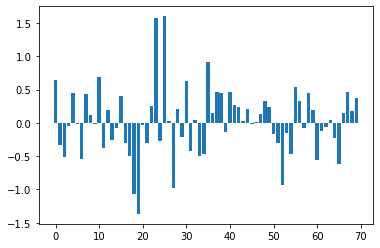

In [60]:
importance = clf_2.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [61]:
# Feature Slection
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel='linear', C=1.0, gamma='auto')
# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select = 1  # Minimum number of features to consider
SV = RFECV(estimator=svc,step=1,cv=StratifiedKFold(5),scoring="accuracy",min_features_to_select=1)
SV.fit(train_X1,train_Y1)

print("Optimal number of features : %d" % SV.n_features_)
SV.get_feature_names_out()

Optimal number of features : 44


array(['x0', 'x1', 'x2', 'x4', 'x6', 'x7', 'x10', 'x11', 'x12', 'x13',
       'x15', 'x17', 'x18', 'x19', 'x21', 'x22', 'x23', 'x24', 'x25',
       'x27', 'x28', 'x29', 'x30', 'x31', 'x33', 'x34', 'x35', 'x37',
       'x38', 'x40', 'x41', 'x44', 'x48', 'x49', 'x51', 'x52', 'x54',
       'x55', 'x56', 'x58', 'x59', 'x60', 'x65', 'x69'], dtype=object)

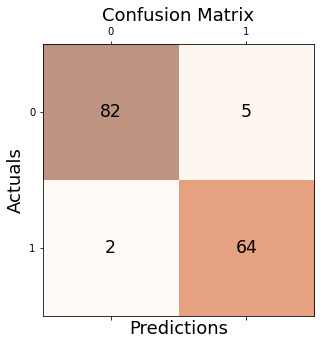

In [62]:
#confusion matrix before feature selection on validation data for binary class 
from sklearn.metrics import confusion_matrix
ENLR = SVC(kernel='linear', C=1.0, gamma='auto')
ENLR.fit(train_X1, y_train[:,0])
y_pred = ENLR.predict(X_validation)
conf_matrix = confusion_matrix(y_true=y_validation[:,0], y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.5)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


Here  
(0,0) = True positive  
(0,1)= False positive  
(1,1)= False Negative  
(1,2)= True negative




In [63]:
#metrics for binary class classification
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
print('Precision: %.3f' % precision_score(y_validation[:,0], y_pred))
print('Recall: %.3f' % recall_score(y_validation[:,0], y_pred))
print('Accuracy: %.3f' % accuracy_score(y_validation[:,0], y_pred))
print('F1 Score: %.3f' % f1_score(y_validation[:,0], y_pred))

Precision: 0.928
Recall: 0.970
Accuracy: 0.954
F1 Score: 0.948


Treatment behaviour

Feature: 0, Score: 0.08632
Feature: 1, Score: 0.01060
Feature: 2, Score: -0.03690
Feature: 3, Score: 0.00675
Feature: 4, Score: 0.01907
Feature: 5, Score: -0.00985
Feature: 6, Score: -0.12513
Feature: 7, Score: -0.03399
Feature: 8, Score: -0.00312
Feature: 9, Score: 0.00098
Feature: 10, Score: 0.09406
Feature: 11, Score: -0.06469
Feature: 12, Score: -0.08588
Feature: 13, Score: 0.09932
Feature: 14, Score: 0.03583
Feature: 15, Score: -0.08442
Feature: 16, Score: -0.02704
Feature: 17, Score: -0.05292
Feature: 18, Score: -0.04199
Feature: 19, Score: 0.07253
Feature: 20, Score: 0.02272
Feature: 21, Score: 0.07474
Feature: 22, Score: -0.01275
Feature: 23, Score: 0.03656
Feature: 24, Score: -0.01470
Feature: 25, Score: 0.00847
Feature: 26, Score: -0.20341
Feature: 27, Score: 0.03439
Feature: 28, Score: -0.09768
Feature: 29, Score: -0.07090
Feature: 30, Score: 0.00404
Feature: 31, Score: -0.00293
Feature: 32, Score: -0.04456
Feature: 33, Score: 0.21398
Feature: 34, Score: 0.01537
Feature: 35,

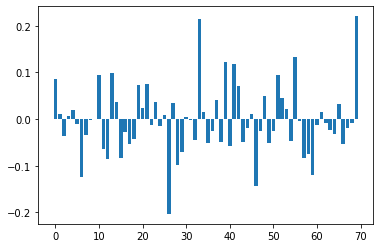

In [64]:
importance = clf_3.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [65]:
# Feature Selection
# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel='linear', C=1.0, gamma='auto')
# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select = 1  # Minimum number of features to consider
SV = RFECV(estimator=svc,step=1,cv=StratifiedKFold(5),scoring="f1_weighted",min_features_to_select=1)
SV.fit(train_X1,train_Y2)

print("Optimal number of features : %d" % SV.n_features_)
SV.get_feature_names_out()

Optimal number of features : 32


array(['x1', 'x2', 'x3', 'x6', 'x9', 'x12', 'x13', 'x15', 'x16', 'x19',
       'x20', 'x22', 'x23', 'x25', 'x26', 'x27', 'x29', 'x30', 'x33',
       'x37', 'x40', 'x42', 'x49', 'x50', 'x51', 'x52', 'x54', 'x55',
       'x56', 'x59', 'x60', 'x69'], dtype=object)

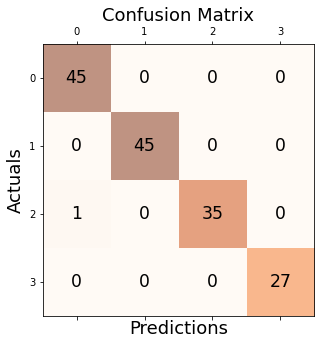

In [66]:
#confusion matrix before feature selection on validation data for multi class 
from sklearn.metrics import confusion_matrix
ENLR = SVC(kernel='linear', C=1.0, gamma='auto')
ENLR.fit(train_X1, y_train[:,1])
y_pred = ENLR.predict(X_validation)
conf_matrix = confusion_matrix(y_true=y_validation[:,1], y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.5)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [67]:
#metrics for multi class classification
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
print('Precision: %.3f' % precision_score(y_validation[:,1],y_pred,average='weighted'))
print('Recall: %.3f' % recall_score(y_validation[:,1], y_pred,average='weighted'))
print('Accuracy: %.3f' % accuracy_score(y_validation[:,1], y_pred))
print('F1 Score: %.3f' % f1_score(y_validation[:,1], y_pred,average='weighted'))

Precision: 0.994
Recall: 0.993
Accuracy: 0.993
F1 Score: 0.993


In [68]:
X_train_feat_2= train_X1.iloc[:, [1, 2,12,13,15,19,22,23,25,27,29,30,33,37,40,49,51,52,54, 55, 56,59, 60, 69] ] 
print(X_train_feat_2)

           1         2         12        13        15        19        22  \
520  0.249564 -0.161131  0.139701  1.580135 -1.066547 -0.681227  0.241529   
148 -0.046378 -0.572717  1.758451 -0.862574 -0.221359 -1.211936  0.728771   
221 -0.045496  0.214813  0.375129 -0.766876  0.381001 -0.443783  0.517019   
556  0.302128  0.893536  0.954186 -0.406781  0.554133 -0.060385  0.751702   
439  0.346891  0.196632 -1.502277  0.343291 -0.691240  0.120966 -0.068431   
..        ...       ...       ...       ...       ...       ...       ...   
71  -1.320613 -0.828001 -0.347796  0.414819 -1.071491 -0.888417 -0.788820   
13  -0.191227 -1.030055 -1.643529  0.349507 -1.247087 -0.820092 -0.407197   
230  1.530025  1.034507 -0.300599  2.076572 -0.066458  1.396200  1.200314   
306 -0.716591  0.085541 -1.141462  1.378356 -0.440377 -0.041975 -0.076148   
673 -0.707937 -1.087027 -0.544385 -0.650378 -0.044688 -0.287985 -0.127856   

           23        25        27  ...        40        49        51  \
520

In [69]:
X_validation_2= X_validation.iloc[:, [1, 2,12,13,15,19,22,23,25,27,29,30,33,37,40,49,51,52,54, 55, 56,59, 60, 69] ] 
print(X_validation_2)

           1         2         12        13        15        19        22  \
177  0.019581 -1.021671  0.262302 -0.451258 -0.668995 -1.444554 -0.476046   
53  -0.514644 -0.762668  0.307491 -0.744640 -0.086154  0.363529 -0.557127   
573  0.642519  1.214867  0.938862 -0.249327  1.489381  1.223582  0.363464   
693 -0.537884 -0.709756 -1.246487  0.688342 -0.617192 -0.422680 -0.618582   
320  0.316670 -0.047292  0.193002 -0.035416  0.256214  0.291461  0.172768   
..        ...       ...       ...       ...       ...       ...       ...   
413 -1.938194 -1.711362 -0.632821 -1.541040 -0.564241 -1.493285 -2.243047   
109  1.463674  0.670134 -0.108893  1.244148  0.282396  0.874234  0.603488   
130  0.136888  0.330240  0.711856 -0.755883  0.110414 -0.663415  0.383036   
260  1.085717  0.950245 -0.603337  0.988500  0.469272  1.325678  1.176164   
73  -1.261793 -1.199271 -0.741216 -0.057034 -1.065131 -1.319169 -2.208225   

           23        25        27  ...        40        49        51  \
177

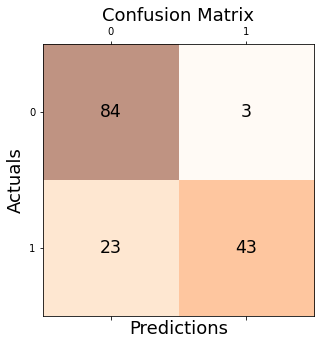

In [79]:
#confusion matrix after feature selection on validation data for binary class 
from sklearn.ensemble import RandomForestClassifier
min_features_to_select = 10  # Minimum number of features to consider
from sklearn.metrics import confusion_matrix
ENLR = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
ENLR.fit(X_train_feat_2, y_train[:,0])
y_pred = ENLR.predict(X_validation_2)
conf_matrix = confusion_matrix(y_true=y_validation[:,0], y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.5)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [80]:
#metrics for binary class classification
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
print('Precision: %.3f' % precision_score(y_validation[:,0], y_pred))
print('Recall: %.3f' % recall_score(y_validation[:,0], y_pred))
print('Accuracy: %.3f' % accuracy_score(y_validation[:,0], y_pred))
print('F1 Score: %.3f' % f1_score(y_validation[:,0], y_pred))

Precision: 0.935
Recall: 0.652
Accuracy: 0.830
F1 Score: 0.768


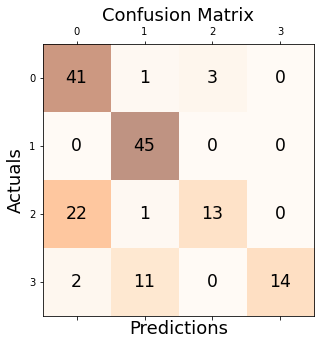

In [81]:
#confusion matrix after feature selection on validation data for multi class 
from sklearn.metrics import confusion_matrix
ENLR = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
ENLR.fit(X_train_feat_2, y_train[:,1])
y_pred = ENLR.predict(X_validation_2)
conf_matrix = confusion_matrix(y_true=y_validation[:,1], y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.5)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [82]:
#metrics for multi class classification
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
print('Precision: %.3f' % precision_score(y_validation[:,1],y_pred,average='weighted'))
print('Recall: %.3f' % recall_score(y_validation[:,1], y_pred,average='weighted'))
print('Accuracy: %.3f' % accuracy_score(y_validation[:,1], y_pred))
print('F1 Score: %.3f' % f1_score(y_validation[:,1], y_pred,average='weighted'))

Precision: 0.781
Recall: 0.739
Accuracy: 0.739
F1 Score: 0.714


Metrics for validation data is less after feature for binary and multi-class classification.

Hence,feature reduction is not helpful in this case for SVM model.

# Random forest

In [83]:
#model accuracy on training data 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
# define the random forest model
model = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
# define the 5-fold cross validation procedure
cv = KFold(n_splits=5,shuffle=False)
# evaluate the model and collect the scores
train_Y1 = y_train[:,0]
n_scores = cross_val_score(model, train_X1, train_Y1, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy for Genotype:' + str(np.mean(n_scores)) + str(np.std(n_scores)))
train_Y2 =y_train[:,1]
n_scores = cross_val_score(model, train_X1, train_Y2, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy:' + str(np.mean(n_scores)) + str(np.std(n_scores)))

Mean Accuracy for Genotype:0.83418236011380590.012784340990163574
Mean Accuracy:0.71600054193198770.03410499139986781


In [84]:
train_Y1.shape

(609,)

Feature: 0, Score: 0.04952
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00502
Feature: 3, Score: 0.00312
Feature: 4, Score: 0.02141
Feature: 5, Score: 0.00488
Feature: 6, Score: 0.00410
Feature: 7, Score: 0.03388
Feature: 8, Score: 0.00529
Feature: 9, Score: 0.00447
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00424
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.02784
Feature: 15, Score: 0.00199
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00518
Feature: 18, Score: 0.00179
Feature: 19, Score: 0.00139
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00697
Feature: 23, Score: 0.00410
Feature: 24, Score: 0.00755
Feature: 25, Score: 0.15595
Feature: 26, Score: 0.00174
Feature: 27, Score: 0.05724
Feature: 28, Score: 0.03662
Feature: 29, Score: 0.01919
Feature: 30, Score: 0.00339
Feature: 31, Score: 0.02352
Feature: 32, Score: 0.02445
Feature: 33, Score: 0.00502
Feature: 34, Score: 0.00427
Feature: 35, Score: 0.00603
Fe

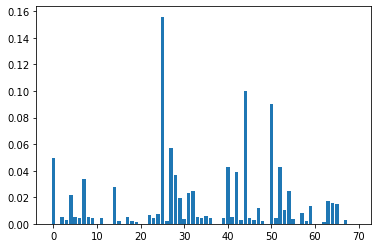

In [85]:
model.fit(train_X1,train_Y1)
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

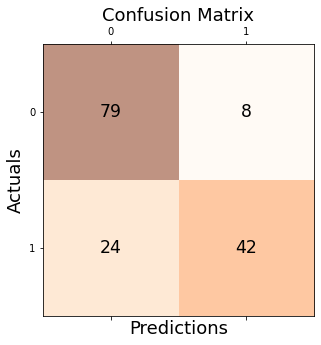

In [86]:
#confusion matrix before feature selection on validation data for binary class 
# The "accuracy" scoring shows the proportion of correct classifications
min_features_to_select = 10  # Minimum number of features to consider
from sklearn.metrics import confusion_matrix
ENLR = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
ENLR.fit(train_X1, y_train[:,0])
y_pred = ENLR.predict(X_validation)
conf_matrix = confusion_matrix(y_true=y_validation[:,0], y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.5)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


In [87]:
#metrics for binary class classification
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
print('Precision: %.3f' % precision_score(y_validation[:,0], y_pred))
print('Recall: %.3f' % recall_score(y_validation[:,0], y_pred))
print('Accuracy: %.3f' % accuracy_score(y_validation[:,0], y_pred))
print('F1 Score: %.3f' % f1_score(y_validation[:,0], y_pred))

Precision: 0.840
Recall: 0.636
Accuracy: 0.791
F1 Score: 0.724


Treatment behavior


Feature: 0, Score: 0.08621
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00247
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.01126
Feature: 5, Score: 0.00217
Feature: 6, Score: 0.04651
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00565
Feature: 9, Score: 0.00587
Feature: 10, Score: 0.00542
Feature: 11, Score: 0.01165
Feature: 12, Score: 0.01416
Feature: 13, Score: 0.02868
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00190
Feature: 16, Score: 0.00152
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00061
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.01288
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00266
Feature: 26, Score: 0.14476
Feature: 27, Score: 0.00143
Feature: 28, Score: 0.04829
Feature: 29, Score: 0.04406
Feature: 30, Score: 0.01758
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00568
Feature: 33, Score: 0.03351
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00155
Fe

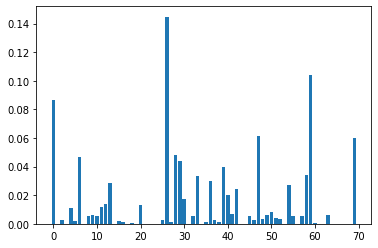

In [88]:
model.fit(train_X1,train_Y2)
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [89]:
# Feature Slection
# Create the RFE object and compute a cross-validated score.
RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select = 1  # Minimum number of features to consider
SV = RFECV(estimator=RF,step=1,cv=StratifiedKFold(5),scoring="accuracy",min_features_to_select=1)
SV.fit(train_X1,train_Y2)

print("Optimal number of features : %d" % SV.n_features_)
SV.get_feature_names_out()

Optimal number of features : 26


array(['x0', 'x4', 'x5', 'x6', 'x8', 'x12', 'x13', 'x20', 'x26', 'x28',
       'x29', 'x30', 'x33', 'x36', 'x39', 'x40', 'x42', 'x45', 'x46',
       'x47', 'x49', 'x52', 'x54', 'x58', 'x59', 'x69'], dtype=object)

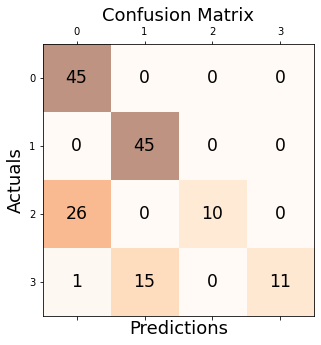

In [90]:
#confusion matrix before feature selection on validation data for multi class 
from sklearn.metrics import confusion_matrix
ENLR = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
ENLR.fit(train_X1, y_train[:,1])
y_pred = ENLR.predict(X_validation)
conf_matrix = confusion_matrix(y_true=y_validation[:,1], y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.5)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


In [91]:
#metrics for multi class classification
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
print('Precision: %.3f' % precision_score(y_validation[:,1],y_pred,average='weighted'))
print('Recall: %.3f' % recall_score(y_validation[:,1], y_pred,average='weighted'))
print('Accuracy: %.3f' % accuracy_score(y_validation[:,1], y_pred))
print('F1 Score: %.3f' % f1_score(y_validation[:,1], y_pred,average='weighted'))

Precision: 0.816
Recall: 0.725
Accuracy: 0.725
F1 Score: 0.683


In [92]:
X_validation_3= X_validation.iloc[:, [0,4,5,6,8,13,26,28,30,33,39,40,42,45,46,49,52,54,59] ] 
print(X_validation_3)

           0         4         5         6         8         13        26  \
177 -0.617081  0.189420  0.597086  0.931286 -0.212237 -0.451258  0.081937   
53  -0.396414 -0.099785  0.027968  0.158624 -0.250735 -0.744640 -0.753770   
573 -0.405123  0.751344  0.264508  1.203719 -0.458783 -0.249327  1.336509   
693  0.024287 -1.415147 -1.480764 -0.723037 -0.320320  0.688342 -0.916126   
320  0.060119  0.621323  0.841828  0.359177  0.000115 -0.035416 -0.741014   
..        ...       ...       ...       ...       ...       ...       ...   
413 -0.928009 -1.465984 -1.619872 -0.603618 -1.299471 -1.541040  0.221327   
109  1.079009  0.211378  0.253909  1.372563  0.672430  1.244148 -0.656773   
130 -0.445741  1.082837  2.369032  1.163528 -0.087249 -0.755883  0.260196   
260  5.744070 -0.664570 -0.219446 -0.345043  4.981823  0.988500 -0.759636   
73  -0.213561 -0.506453 -0.214095 -0.780341 -0.845492 -0.057034 -0.964900   

           28        30        33        39        40        42        45  

In [93]:
X_train_feat_3= train_X1.iloc[:, [0,4,5,6,8,13,26,28,30,33,39,40,42,45,46,49,52,54,59] ] 
print(X_train_feat_3)


           0         4         5         6         8         13        26  \
520 -0.144682  0.396939  0.162197 -0.050710 -0.495128  1.580135 -0.795767   
148 -0.563077  1.978114  5.071589  1.455339 -0.245882 -0.862574  0.656544   
221 -0.595401  1.141862  2.309884  0.795267  0.511790 -0.766876  0.337559   
556 -0.411826  0.268005  0.768248 -0.203377  0.112872 -0.406781  2.013042   
439  1.373799 -0.376046 -0.692494 -0.964000  0.988904  0.343291 -0.797287   
..        ...       ...       ...       ...       ...       ...       ...   
71  -0.031211 -0.472121 -0.216911 -0.274476 -0.449787  0.414819 -0.960947   
13  -0.202930 -0.175269  0.226352 -1.581029 -0.445906  0.349507 -0.687080   
230 -0.219377  0.295395 -0.219327 -0.190574  0.165233  2.076572 -0.673032   
306 -0.116029 -0.796171 -0.911084 -0.663976 -0.600155  1.378356 -0.942512   
673 -0.166273  2.330371  1.124358 -0.899496  0.387120 -0.650378 -0.555375   

           28        30        33        39        40        42        45  

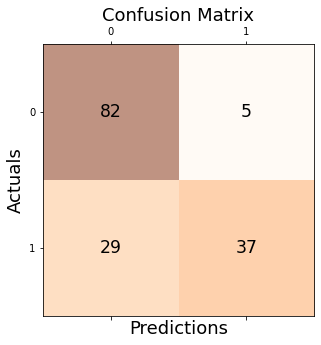

In [94]:
#confusion matrix after feature selection on validation data for binary class 
# The "accuracy" scoring shows the proportion of correct classifications
min_features_to_select = 10  # Minimum number of features to consider
from sklearn.metrics import confusion_matrix
ENLR = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
ENLR.fit(X_train_feat_3, y_train[:,0])
y_pred = ENLR.predict(X_validation_3)
conf_matrix = confusion_matrix(y_true=y_validation[:,0], y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.5)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()



In [95]:
#metrics for binary class classification
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
print('Precision: %.3f' % precision_score(y_validation[:,0], y_pred))
print('Recall: %.3f' % recall_score(y_validation[:,0], y_pred))
print('Accuracy: %.3f' % accuracy_score(y_validation[:,0], y_pred))
print('F1 Score: %.3f' % f1_score(y_validation[:,0], y_pred))

Precision: 0.881
Recall: 0.561
Accuracy: 0.778
F1 Score: 0.685


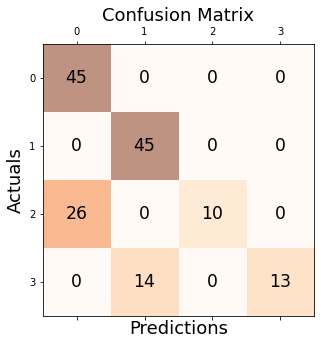

In [96]:
#confusion matrix after feature selection on validation data for multi class 
from sklearn.metrics import confusion_matrix
ENLR = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
ENLR.fit(X_train_feat_3, y_train[:,1])
y_pred = ENLR.predict(X_validation_3)
conf_matrix = confusion_matrix(y_true=y_validation[:,1], y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.5)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


In [97]:
#metrics for multi class classification
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
print('Precision: %.3f' % precision_score(y_validation[:,1],y_pred,average='weighted'))
print('Recall: %.3f' % recall_score(y_validation[:,1], y_pred,average='weighted'))
print('Accuracy: %.3f' % accuracy_score(y_validation[:,1], y_pred))
print('F1 Score: %.3f' % f1_score(y_validation[:,1], y_pred,average='weighted'))

Precision: 0.823
Recall: 0.739
Accuracy: 0.739
F1 Score: 0.700


Since Accuracy for binary class is less after feature reduction ,there is no need for feature reduction.

Accuracy for multi class is more after feature reduction .  



# Neural network with single ReLU hidden layer and Softmax output

In [98]:
#model accuracy on training data 
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
# define the random forest model
model = MLPClassifier(hidden_layer_sizes=(100),activation='relu', alpha=0.01)
#model.out_activation_='softmax'
# define the 5-fold cross validation procedure
cv = KFold(n_splits=5,shuffle=False)
# evaluate the model and collect the scores
train_Y1 =y_train[:,0]
n_scores = cross_val_score(model, train_X1, train_Y1, scoring='balanced_accuracy', cv=cv, n_jobs=-1)
print('balanced Accuracy for Genotype:' + str(np.mean(n_scores)) + str(np.std(n_scores)))
train_Y2 =y_train[:,1]
n_scores = cross_val_score(model, train_X1, train_Y2, scoring='f1_weighted', cv=cv, n_jobs=-1)
print('f1 score for Treatment_Behavior:' + str(np.mean(n_scores)) + str(np.std(n_scores)))

balanced Accuracy for Genotype:0.99156087323997770.01011761699001957
f1 score for Treatment_Behavior:0.99671707649111150.004020747412160293


In [99]:
# Training on the entire data set

from sklearn.svm import SVC
train_Y1 =y_train[:,0]
clf_6 =MLPClassifier(hidden_layer_sizes=(100),activation='relu', alpha=0.01)
clf_6.fit(train_X1,train_Y1)
y_lr_6 = clf_6.predict(train_X1)
clf_6.score(train_X1, np.ravel(train_Y1))

1.0

In [100]:
 #Training on the entire data set

from sklearn.svm import SVC
train_Y2 =y_train[:,1]
clf_7 =MLPClassifier(hidden_layer_sizes=(100),activation='relu', alpha=0.01)
clf_7.fit(train_X1,train_Y2)
y_lr_7 = clf_7.predict(train_X1)
clf_7.score(train_X1, np.ravel(train_Y2))

1.0

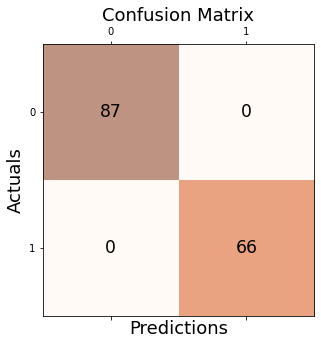

In [101]:
#confusion matrix before feature selection on validation data for binary class 
# The "accuracy" scoring shows the proportion of correct classifications
min_features_to_select = 10  # Minimum number of features to consider
from sklearn.metrics import confusion_matrix
ENLR = MLPClassifier(hidden_layer_sizes=(100),activation='relu', alpha=0.01)
ENLR.fit(train_X1, y_train[:,0])
y_pred = ENLR.predict(X_validation)
conf_matrix = confusion_matrix(y_true=y_validation[:,0], y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.5)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


In [102]:
#metrics for binary class classification
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
print('Precision: %.3f' % precision_score(y_validation[:,0], y_pred))
print('Recall: %.3f' % recall_score(y_validation[:,0], y_pred))
print('Accuracy: %.3f' % accuracy_score(y_validation[:,0], y_pred))
print('F1 Score: %.3f' % f1_score(y_validation[:,0], y_pred))

Precision: 1.000
Recall: 1.000
Accuracy: 1.000
F1 Score: 1.000


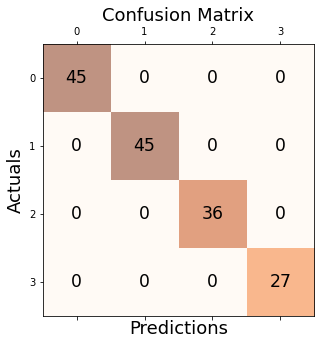

In [103]:
#confusion matrix before feature selection on validation data for multi class 
from sklearn.metrics import confusion_matrix
ENLR =  MLPClassifier(hidden_layer_sizes=(100),activation='relu', alpha=0.01)
ENLR.fit(train_X1, y_train[:,1])
y_pred = ENLR.predict(X_validation)
conf_matrix = confusion_matrix(y_true=y_validation[:,1], y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.5)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [104]:
#metrics for multi class classification
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
print('Precision: %.3f' % precision_score(y_validation[:,1],y_pred,average='weighted'))
print('Recall: %.3f' % recall_score(y_validation[:,1], y_pred,average='weighted'))
print('Accuracy: %.3f' % accuracy_score(y_validation[:,1], y_pred))
print('F1 Score: %.3f' % f1_score(y_validation[:,1], y_pred,average='weighted'))

Precision: 1.000
Recall: 1.000
Accuracy: 1.000
F1 Score: 1.000


There is 100% accuracy on validation data.

In [105]:
#feature reduction using permutation importance
from sklearn.inspection import permutation_importance
X = train_X1
y = y_train[:,0]
clf_8 = MLPClassifier(hidden_layer_sizes=(100),activation='relu', alpha=0.01).fit(X, y)
result = permutation_importance(clf_8, X, y, n_repeats=10,random_state=0)
std_1= result.importances_std
print(std_1)

[0.00122879 0.         0.00049261 0.00075248 0.00213465 0.
 0.00082102 0.00080443 0.00075248 0.00128247 0.00082102 0.00049261
 0.00114943 0.00075248 0.00049261 0.00110151 0.         0.
 0.0010892  0.0010892  0.         0.         0.         0.00256494
 0.         0.00805268 0.         0.00197727 0.         0.00049261
 0.00403554 0.00217841 0.00122879 0.00208351 0.00049261 0.00395795
 0.         0.00065681 0.         0.         0.00049261 0.00049261
 0.00065681 0.         0.00049261 0.         0.00075248 0.
 0.         0.00049261 0.         0.         0.0037046  0.00128247
 0.         0.         0.00088426 0.00146868 0.00065681 0.00049261
 0.         0.00131363 0.         0.         0.         0.0023453
 0.00110151 0.         0.         0.00049261]


In [106]:
res_1 = [idx for idx, val in enumerate(std_1) if val != 0]
print("Indices of Non-Zero elements : " + str(res_1))
  

Indices of Non-Zero elements : [0, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 18, 19, 23, 25, 27, 29, 30, 31, 32, 33, 34, 35, 37, 40, 41, 42, 44, 46, 49, 52, 53, 56, 57, 58, 59, 61, 65, 66, 69]


In [107]:
from sklearn.inspection import permutation_importance
X = train_X1
y = y_train[:,1]
clf_9 = MLPClassifier(hidden_layer_sizes=(100),activation='relu', alpha=0.01).fit(X, y)
result = permutation_importance(clf_9, X, y, n_repeats=10,random_state=0)
std_2 = result.importances_std
print(std_2)

[0.00122879 0.         0.         0.00065681 0.00049261 0.
 0.00186499 0.00075248 0.00160886 0.00049261 0.         0.
 0.         0.00088426 0.0010892  0.00075248 0.00075248 0.
 0.         0.00065681 0.         0.00217841 0.00080443 0.
 0.00065681 0.00232799 0.00147783 0.         0.         0.00143149
 0.         0.00065681 0.00065681 0.00075248 0.         0.0010892
 0.00171434 0.00105142 0.00165023 0.00065681 0.00065681 0.00065681
 0.00075248 0.00049261 0.00049261 0.         0.00167455 0.
 0.         0.00150495 0.00080443 0.0010892  0.00049261 0.00049261
 0.00075248 0.00049261 0.00160886 0.         0.         0.00080443
 0.00082102 0.         0.         0.         0.         0.
 0.00049261 0.         0.         0.        ]


Feature importance in MLP classifier using permutation importance

https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html

In [108]:
res_2 = [idx for idx, val in enumerate(std_2) if val != 0]
print("Indices of Non-Zero elements : " + str(res_2))
  

Indices of Non-Zero elements : [0, 3, 4, 6, 7, 8, 9, 13, 14, 15, 16, 19, 21, 22, 24, 25, 26, 29, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 49, 50, 51, 52, 53, 54, 55, 56, 59, 60, 66]


In [109]:
print(np.union1d(res_1, res_2))

[ 0  2  3  4  6  7  8  9 10 11 12 13 14 15 16 18 19 21 22 23 24 25 26 27
 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 46 49 50 51 52 53 54 55
 56 57 58 59 60 61 65 66 69]


In [110]:
X_train_feat_4= train_X1.iloc[:, [ 0 , 2, 3, 4, 5, 6, 7, 8, 9 ,12 ,14, 15, 16, 18, 19, 21 ,22 ,23, 24, 25, 26, 27 ,29, 30,31 ,32, 33, 34, 35 ,36 ,37 ,38, 39, 40, 41 ,43 ,44, 46 ,49 ,50 ,51 ,52 ,54, 55, 56, 57, 58, 59,60, 61, 65, 66]  ]
display(X_train_feat_4)  

,0,2,3,4,5,6,7,8,9,12,...,54,55,56,57,58,59,60,61,65,66
520,-0.144682,-0.161131,0.082958,0.396939,0.162197,-0.050710,-0.219348,-0.495128,0.172257,0.139701,...,-1.391617,-0.336477,-0.986366,0.250006,-0.572297,0.236543,0.828273,0.349018,-0.064871,-0.251291
148,-0.563077,-0.572717,-1.038916,1.978114,5.071589,1.455339,0.668131,-0.245882,1.678318,1.758451,...,1.764643,0.984685,1.559966,1.110561,2.804143,1.365248,-0.092849,0.079196,0.442596,0.898528
221,-0.595401,0.214813,-0.713342,1.141862,2.309884,0.795267,1.046223,0.511790,1.289715,0.375129,...,0.247708,-0.998367,-0.211368,0.410460,0.239017,1.161516,-0.113293,-0.918762,0.374066,0.065391
556,-0.411826,0.893536,0.801438,0.268005,0.768248,-0.203377,0.197631,0.112872,0.593894,0.954186,...,-1.245811,-0.850044,-0.600273,-0.853326,-0.511081,0.277847,-1.728835,-0.178194,-0.651594,2.886524
439,1.373799,0.196632,-0.259541,-0.376046,-0.692494,-0.964000,-0.068997,0.988904,-1.100384,-1.502277,...,-0.604470,-0.649838,-0.634199,1.427289,-1.922143,-1.703805,0.421753,-0.722357,-1.214899,-0.653841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,-0.031211,-0.828001,-0.366266,-0.472121,-0.216911,-0.274476,-1.438274,-0.449787,-0.264043,-0.347796,...,0.132942,1.291045,-0.358771,-0.006465,0.482795,-0.581515,0.942480,0.565702,-1.263063,-0.684913
13,-0.202930,-1.030055,-0.574390,-0.175269,0.226352,-1.581029,-1.038725,-0.445906,-0.581621,-1.643529,...,-1.328376,-1.232257,-0.987065,-1.728205,-1.158937,-1.466334,-0.145326,-1.226501,-0.451266,0.027832
230,-0.219377,1.034507,1.312928,0.295395,-0.219327,-0.190574,-0.555324,0.165233,0.135659,-0.300599,...,-0.425415,1.207088,0.602232,-0.197742,-0.199077,-0.741960,0.226320,0.004116,1.213824,0.363883
306,-0.116029,0.085541,-0.107516,-0.796171,-0.911084,-0.663976,-0.561758,-0.600155,-0.873022,-1.141462,...,-0.363592,-0.192214,0.861034,-0.213141,-0.834130,-0.248869,1.277475,-0.739584,0.212942,-0.527029


In [111]:
X_train_val_4= X_validation.iloc[:, [ 0 , 2, 3, 4, 5, 6, 7, 8, 9 ,12 ,14, 15, 16, 18, 19, 21 ,22 ,23, 24, 25, 26, 27 ,29, 30,31 ,32, 33, 34, 35 ,36 ,37 ,38, 39, 40, 41 ,43 ,44, 46 ,49 ,50 ,51 ,52 ,54, 55, 56, 57, 58, 59,60, 61, 65, 66] ]
display(X_train_val_4) 

,0,2,3,4,5,6,7,8,9,12,...,54,55,56,57,58,59,60,61,65,66
177,-0.617081,-1.021671,-0.954449,0.189420,0.597086,0.931286,-0.668134,-0.212237,0.317092,0.262302,...,0.628025,-0.314203,0.520224,0.239872,1.371327,0.801343,-0.527723,0.276982,0.603777,0.615749
53,-0.396414,-0.762668,0.288600,-0.099785,0.027968,0.158624,-1.189485,-0.250735,0.231412,0.307491,...,1.529775,1.330309,0.875588,0.135471,0.468893,0.299486,-0.078485,0.541239,0.913977,-0.307514
573,-0.405123,1.214867,1.299526,0.751344,0.264508,1.203719,1.252381,-0.458783,1.348959,0.938862,...,0.501091,0.250403,0.302835,0.892045,0.168012,1.015965,0.215468,0.369244,0.431761,0.708297
693,0.024287,-0.709756,-0.704678,-1.415147,-1.480764,-0.723037,-0.297364,-0.320320,-1.103186,-1.246487,...,-0.328302,0.716917,-0.503599,-0.675141,-0.889735,-0.613705,-0.036539,0.197737,-1.219384,0.644111
320,0.060119,-0.047292,0.550627,0.621323,0.841828,0.359177,1.194946,0.000115,0.441306,0.193002,...,-1.607908,-1.682538,-1.148343,-0.458042,-0.668885,-0.387933,-1.986179,-1.452452,-1.910031,-0.753981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,-0.928009,-1.711362,-1.273752,-1.465984,-1.619872,-0.603618,-0.797964,-1.299471,-1.262723,-0.632821,...,1.779716,-0.958181,-0.280852,0.483660,0.519275,-0.558444,-1.376403,0.018432,-0.817646,4.232923
109,1.079009,0.670134,0.774281,0.211378,0.253909,1.372563,0.542894,0.672430,0.510282,-0.108893,...,-0.434894,0.391824,-0.005373,-0.179119,-0.863226,-0.147361,0.972155,0.603857,0.016932,-0.687764
130,-0.445741,0.330240,-0.248505,1.082837,2.369032,1.163528,0.284204,-0.087249,0.863974,0.711856,...,1.089488,-0.130239,0.499934,0.918771,1.281913,1.333218,0.113200,1.766455,1.027209,-0.130281
260,5.744070,0.950245,1.220245,-0.664570,-0.219446,-0.345043,0.183350,4.981823,-0.624936,-0.603337,...,-0.889019,-0.454717,-0.909428,-0.333866,-0.965992,-2.334912,3.113571,-0.810631,0.308374,-0.913421


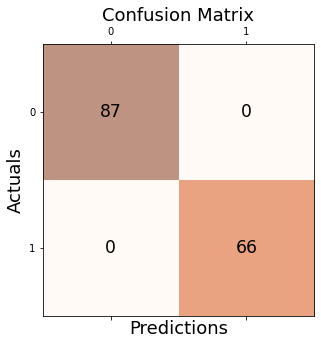

In [112]:
#confusion matrix after feature selection on validation data for binary class 
min_features_to_select = 10  # Minimum number of features to consider
from sklearn.metrics import confusion_matrix
ENLR = MLPClassifier(hidden_layer_sizes=(100),activation='relu', alpha=0.01)
ENLR.fit(X_train_feat_4, y_train[:,0])
y_pred = ENLR.predict(X_train_val_4)
conf_matrix = confusion_matrix(y_true=y_validation[:,0], y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.5)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


In [113]:
#metrics for binary class classification\
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
print('Precision: %.3f' % precision_score(y_validation[:,0], y_pred))
print('Recall: %.3f' % recall_score(y_validation[:,0], y_pred))
print('Accuracy: %.3f' % accuracy_score(y_validation[:,0], y_pred))
print('F1 Score: %.3f' % f1_score(y_validation[:,0], y_pred))

Precision: 1.000
Recall: 1.000
Accuracy: 1.000
F1 Score: 1.000


c:\Users\Akash Kumawat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


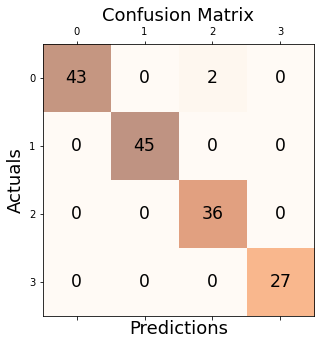

In [114]:
#confusion matrix after feature selection on validation data for multi class 
from sklearn.metrics import confusion_matrix
ENLR =MLPClassifier(hidden_layer_sizes=(100),activation='relu', alpha=0.01)
ENLR.fit(X_train_feat_4, y_train[:,1])
y_pred = ENLR.predict(X_train_val_4)
conf_matrix = confusion_matrix(y_true=y_validation[:,1], y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.5)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


In [115]:
#metrics for multi class classification
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
print('Precision: %.3f' % precision_score(y_validation[:,1],y_pred,average='weighted'))
print('Recall: %.3f' % recall_score(y_validation[:,1], y_pred,average='weighted'))
print('Accuracy: %.3f' % accuracy_score(y_validation[:,1], y_pred))
print('F1 Score: %.3f' % f1_score(y_validation[:,1], y_pred,average='weighted'))

Precision: 0.988
Recall: 0.987
Accuracy: 0.987
F1 Score: 0.987


Here, metrics for binary and multiclass for validation data are same before and after feature reduction.
100% accuracy before and after feature reduction is observed.



Selecting the model:-

Since metrics is higher for Neural network model, it is considered the best model among the given models.

Predicting the test data on the best model

#Testing the model

In [116]:
X_test_4= test_X.iloc[:, [ 0 , 2, 3, 4, 5, 6, 7, 8, 9 ,12 ,14, 15, 16, 18, 19, 21 ,22 ,23, 24, 25, 26, 27 ,29, 30,31 ,32, 33, 34, 35 ,36 ,37 ,38, 39, 40, 41 ,43 ,44, 46 ,49 ,50 ,51 ,52 ,54, 55, 56, 57, 58, 59,60, 61, 65, 66] ]
display(X_test_4)  

,0,2,3,4,5,6,7,8,9,12,...,54,55,56,57,58,59,60,61,65,66
0,1.100803,2.583259,1.974701,2.394221,-0.582594,0.365164,-1.376292,0.822835,1.063762,0.795188,...,2.442329,1.619137,3.388026,-0.014702,0.019297,0.015607,0.462427,0.482716,-0.210680,-0.175553
1,1.225392,2.915630,2.144586,2.459251,-0.467399,0.462236,-1.332976,1.602315,1.480666,1.060826,...,2.719291,1.305800,3.161261,0.443330,-0.156189,-0.071704,0.431673,1.084179,-0.829682,-0.121121
2,1.189037,3.009620,2.367066,2.407598,-0.413003,0.263538,-1.357593,1.595749,1.992142,1.165553,...,2.197058,1.009904,2.999098,0.088637,-0.650549,0.018470,-0.002790,0.853680,-0.844528,-0.492996
3,0.788419,1.595803,1.086687,2.278297,-0.106337,0.172848,-0.821312,0.149973,0.860422,0.563109,...,2.136012,1.112484,2.092475,0.252354,-0.434584,-0.196458,0.463602,0.068838,0.391754,-0.053447
4,0.887416,1.923244,1.501161,2.493537,0.022067,0.493524,-0.757459,0.423275,1.159789,0.913023,...,2.286016,1.006073,2.283931,0.957481,-0.441478,-0.267874,0.307656,0.848849,-0.335557,0.061378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,-1.008066,-1.076567,-2.055177,-2.001432,-0.802076,-0.871643,-0.956547,-1.124435,-1.772423,-1.524693,...,-0.188860,-0.284524,1.573288,1.032512,0.371427,0.827694,0.663931,0.597659,-0.341032,0.051741
221,-0.828023,-0.560376,-1.470007,-1.571760,-0.106214,0.041258,-0.655581,-0.581492,-1.381017,-0.846324,...,-0.539732,-0.138485,1.534763,0.164790,0.138566,0.742537,0.594961,0.178356,-0.515222,-0.127213
222,-1.064726,-1.205792,-2.411096,-2.134322,-0.600705,-0.783159,-1.219725,-1.200692,-1.907260,-1.263710,...,-0.657678,-0.611225,1.166184,1.734383,0.336407,0.870254,0.465247,0.846407,-0.240454,-0.102598
223,-1.084540,-1.254841,-2.367244,-2.050418,-0.661345,-1.058192,-1.231263,-1.403294,-1.765824,-1.644818,...,-0.531168,-0.051653,1.218059,1.055086,0.492068,0.917515,0.771569,0.982325,-0.333785,-0.128166


In [117]:
test_Y1 = mousetest_df['Genotype']
test_Y2 = mousetest_df['Treatment_Behavior']

In [118]:
# define model
model = MLPClassifier(hidden_layer_sizes=(100),activation='relu', alpha=0.01,max_iter = 1000)
# fit model
model.fit(X_train_feat_4, train_Y1)
# make predictions
yhat = model.predict(X_train_val_4)
# evaluate predictions
accuracy = accuracy_score(y_validation[:,0], yhat)
print('Accuracy: %.3f' % (accuracy * 100))


Accuracy: 100.000


In [119]:
# define model
model = MLPClassifier(hidden_layer_sizes=(100),activation='relu', alpha=0.01,max_iter = 1000)
# fit model
model.fit(X_train_feat_4, train_Y2)
# make predictions
yhat = model.predict(X_train_val_4)
# evaluate predictions
accuracy = accuracy_score(y_validation[:,1], yhat)
print('Accuracy: %.3f' % (accuracy * 100))

Accuracy: 100.000


In [120]:
#Predicting the test data
# define model
model = MLPClassifier(hidden_layer_sizes=(100),activation='relu', alpha=0.01,max_iter =1000)
# fit model
model.fit(X_train_feat_4, train_Y1)
# make predictions
yhat = model.predict(X_test_4)
# evaluate predictions
accuracy = accuracy_score(test_Y1, yhat)
print('Accuracy: %.3f' % (accuracy * 100))


Accuracy: 65.333


In [121]:
# define model
model = MLPClassifier(hidden_layer_sizes=(100),activation='relu', alpha=0.01,max_iter =1000)
# fit model
model.fit(X_train_feat_4, train_Y2)
# make predictions
yhat = model.predict(X_test_4)
# evaluate predictions
accuracy = accuracy_score(test_Y2, yhat)
print('Accuracy: %.3f' % (accuracy * 100))

Accuracy: 39.111


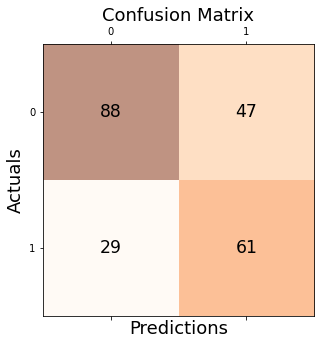

Precision: 0.565
Recall: 0.678
Accuracy: 0.662
F1 Score: 0.616


In [122]:
#confusion matrix after feature selection on validation data for binary class 
min_features_to_select = 10  # Minimum number of features to consider
from sklearn.metrics import confusion_matrix
ENLR = MLPClassifier(hidden_layer_sizes=(100),activation='relu', alpha=0.01,max_iter=1000)
ENLR.fit(X_train_feat_4, y_train[:,0])
y_pred = ENLR.predict(X_test_4)
conf_matrix = confusion_matrix(y_true=test_Y1, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.5)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#metrics for binary class classification\
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
print('Precision: %.3f' % precision_score(test_Y1, y_pred))
print('Recall: %.3f' % recall_score(test_Y1, y_pred))
print('Accuracy: %.3f' % accuracy_score(test_Y1, y_pred))
print('F1 Score: %.3f' % f1_score(test_Y1, y_pred))


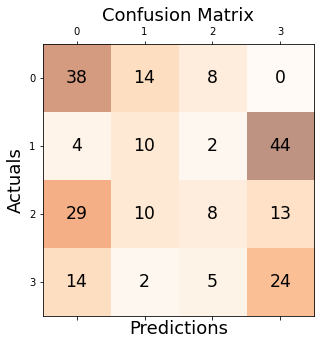

Precision: 0.345
Recall: 0.356
Accuracy: 0.356
F1 Score: 0.323


In [123]:
#confusion matrix after feature selection on validation data for multi class 
min_features_to_select = 10  # Minimum number of features to consider
from sklearn.metrics import confusion_matrix
ENLR = MLPClassifier(hidden_layer_sizes=(100),activation='relu', alpha=0.01,max_iter=1000)
ENLR.fit(X_train_feat_4, y_train[:,1])
y_pred = ENLR.predict(X_test_4)
conf_matrix = confusion_matrix(y_true=test_Y2, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.5)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#metrics for binary class classification\
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
print('Precision: %.3f' % precision_score(test_Y2, y_pred,average='weighted'))
print('Recall: %.3f' % recall_score(test_Y2, y_pred,average='weighted'))
print('Accuracy: %.3f' % accuracy_score(test_Y2, y_pred))
print('F1 Score: %.3f' % f1_score(test_Y2, y_pred,average='weighted'))



Upon Testing data after recursive elimination we are getting good accuracy for "Genotype" and less accuracy for "Treatment behaviour"